
# Explore Exercises

In [1]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy import stats

import acquire
import prepare

plt.rcParams["figure.figsize"] = (16, 9)
%config InlineBackend.figure_format='retina'

### Using iris data from our mySQL server and the methods used in the lesson above:

#### 1. Acquire, prepare, and split your data.

In [2]:
iris = acquire.get_iris_data()
train, val, test = prepare.prep_iris(iris)
train

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0
...,...,...,...,...,...,...,...,...
11,setosa,4.8,3.4,1.6,0.2,1,0,0
85,versicolor,6.0,3.4,4.5,1.6,0,1,0
55,versicolor,5.7,2.8,4.5,1.3,0,1,0
44,setosa,5.1,3.8,1.9,0.4,1,0,0


In [3]:
train.shape, val.shape, test.shape

((84, 8), (36, 8), (30, 8))

In [4]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


Split your data into train, validate, and test samples.

#### 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using `.describe()`).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


In [7]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
79,versicolor,5.7,2.6,3.5,1.0,0,1,0
36,setosa,5.5,3.5,1.3,0.2,1,0,0
133,virginica,6.3,2.8,5.1,1.5,0,0,1
95,versicolor,5.7,3.0,4.2,1.2,0,1,0
18,setosa,5.7,3.8,1.7,0.3,1,0,0


In [8]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


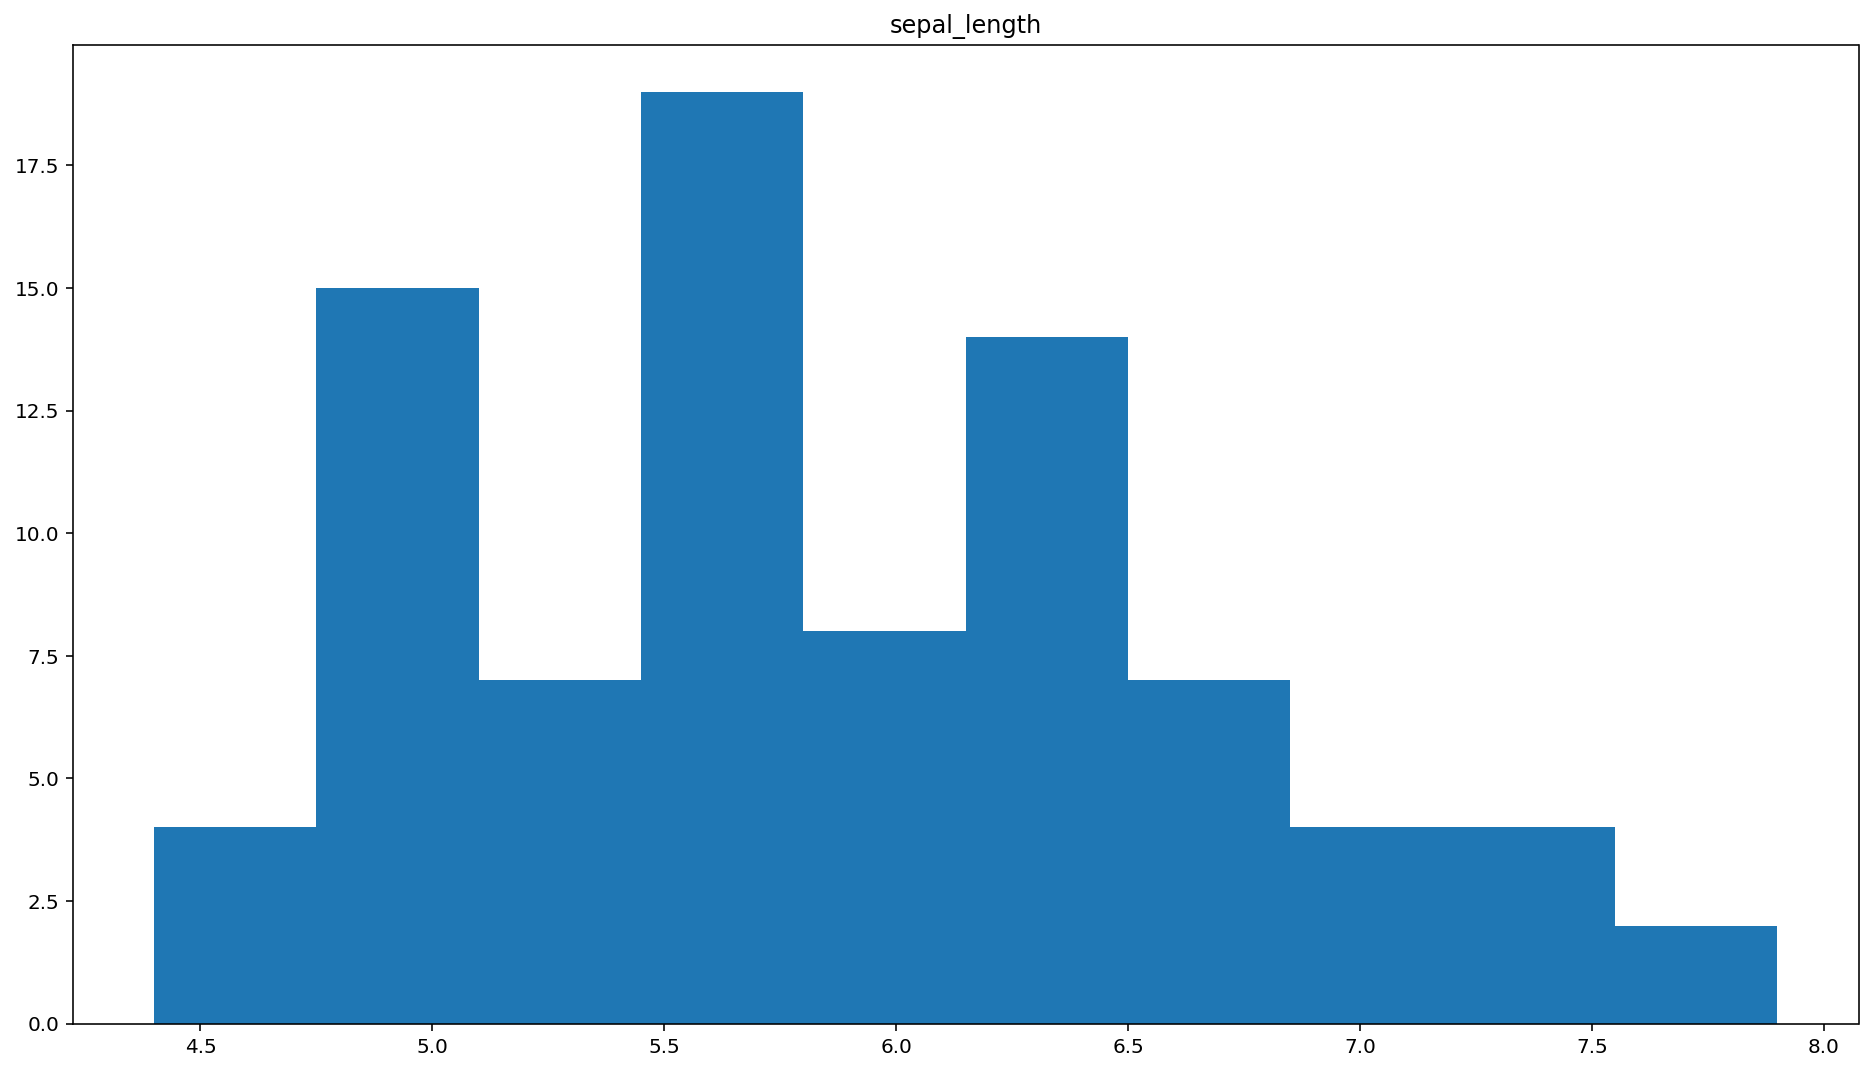

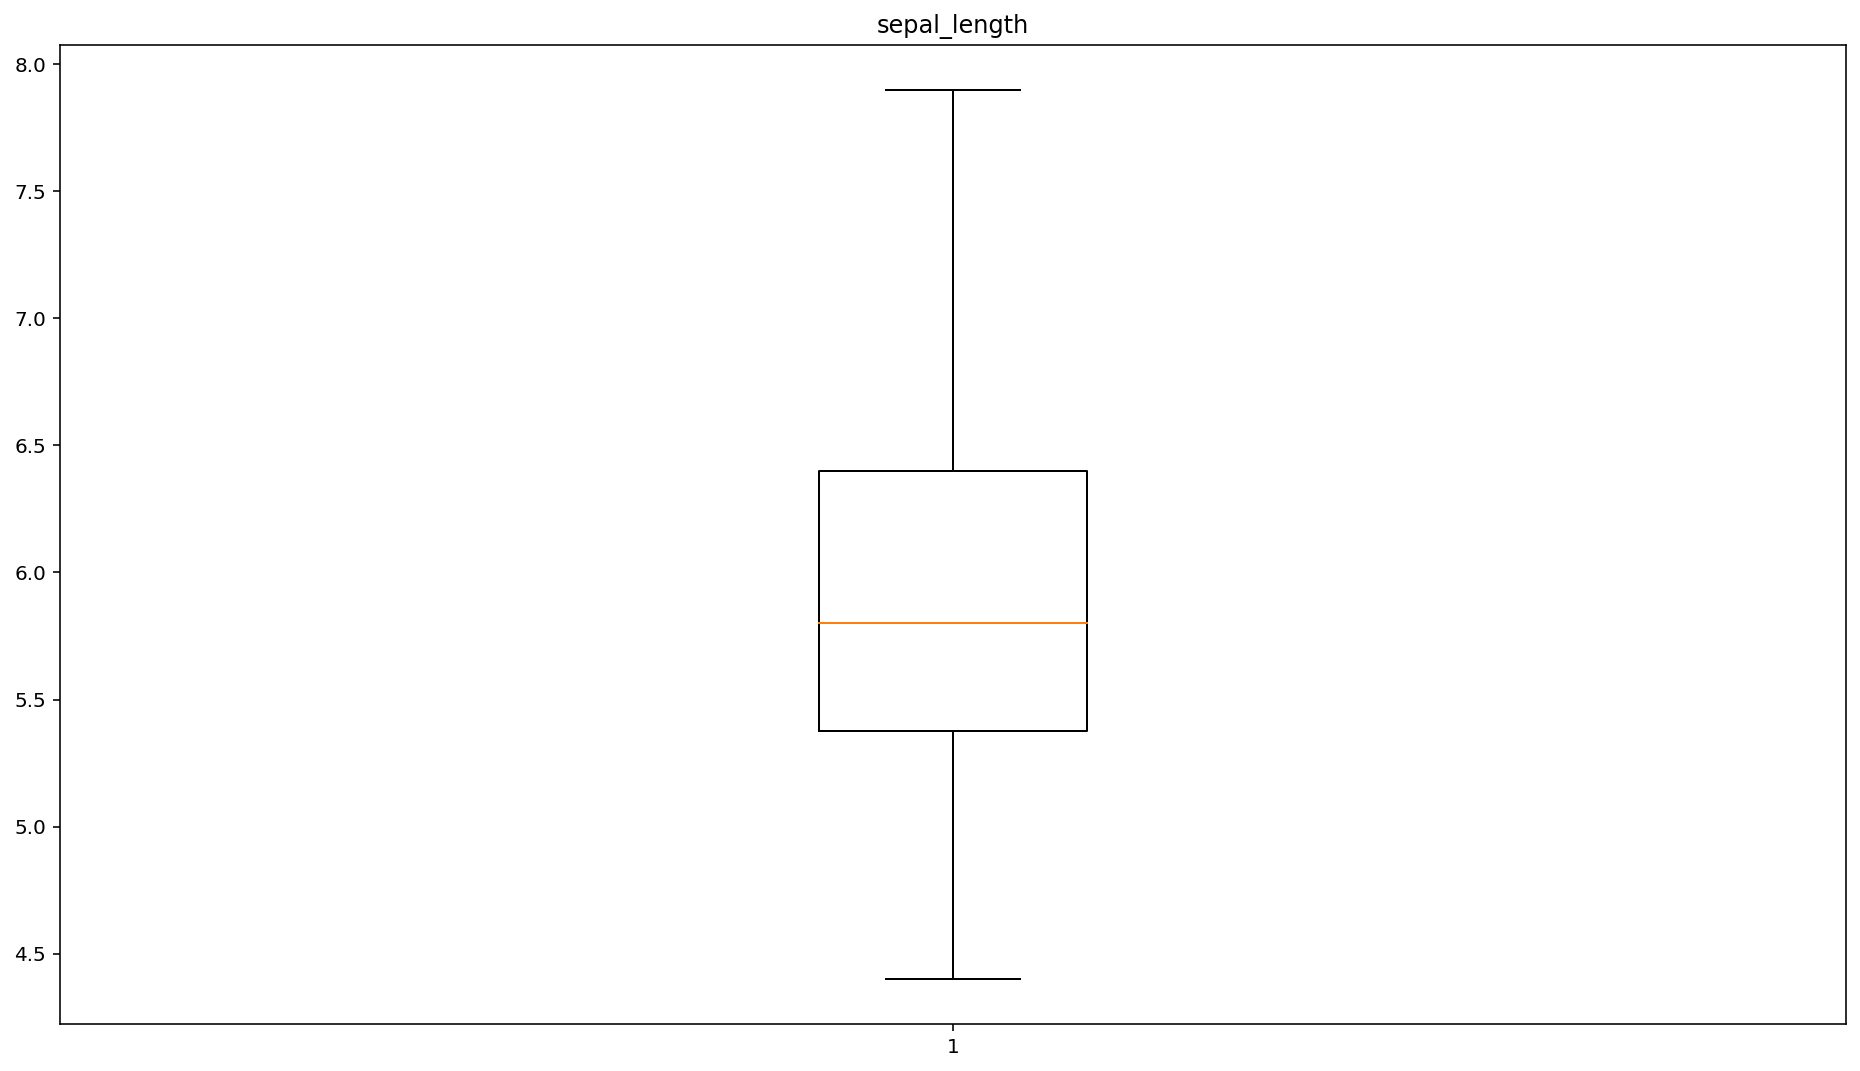

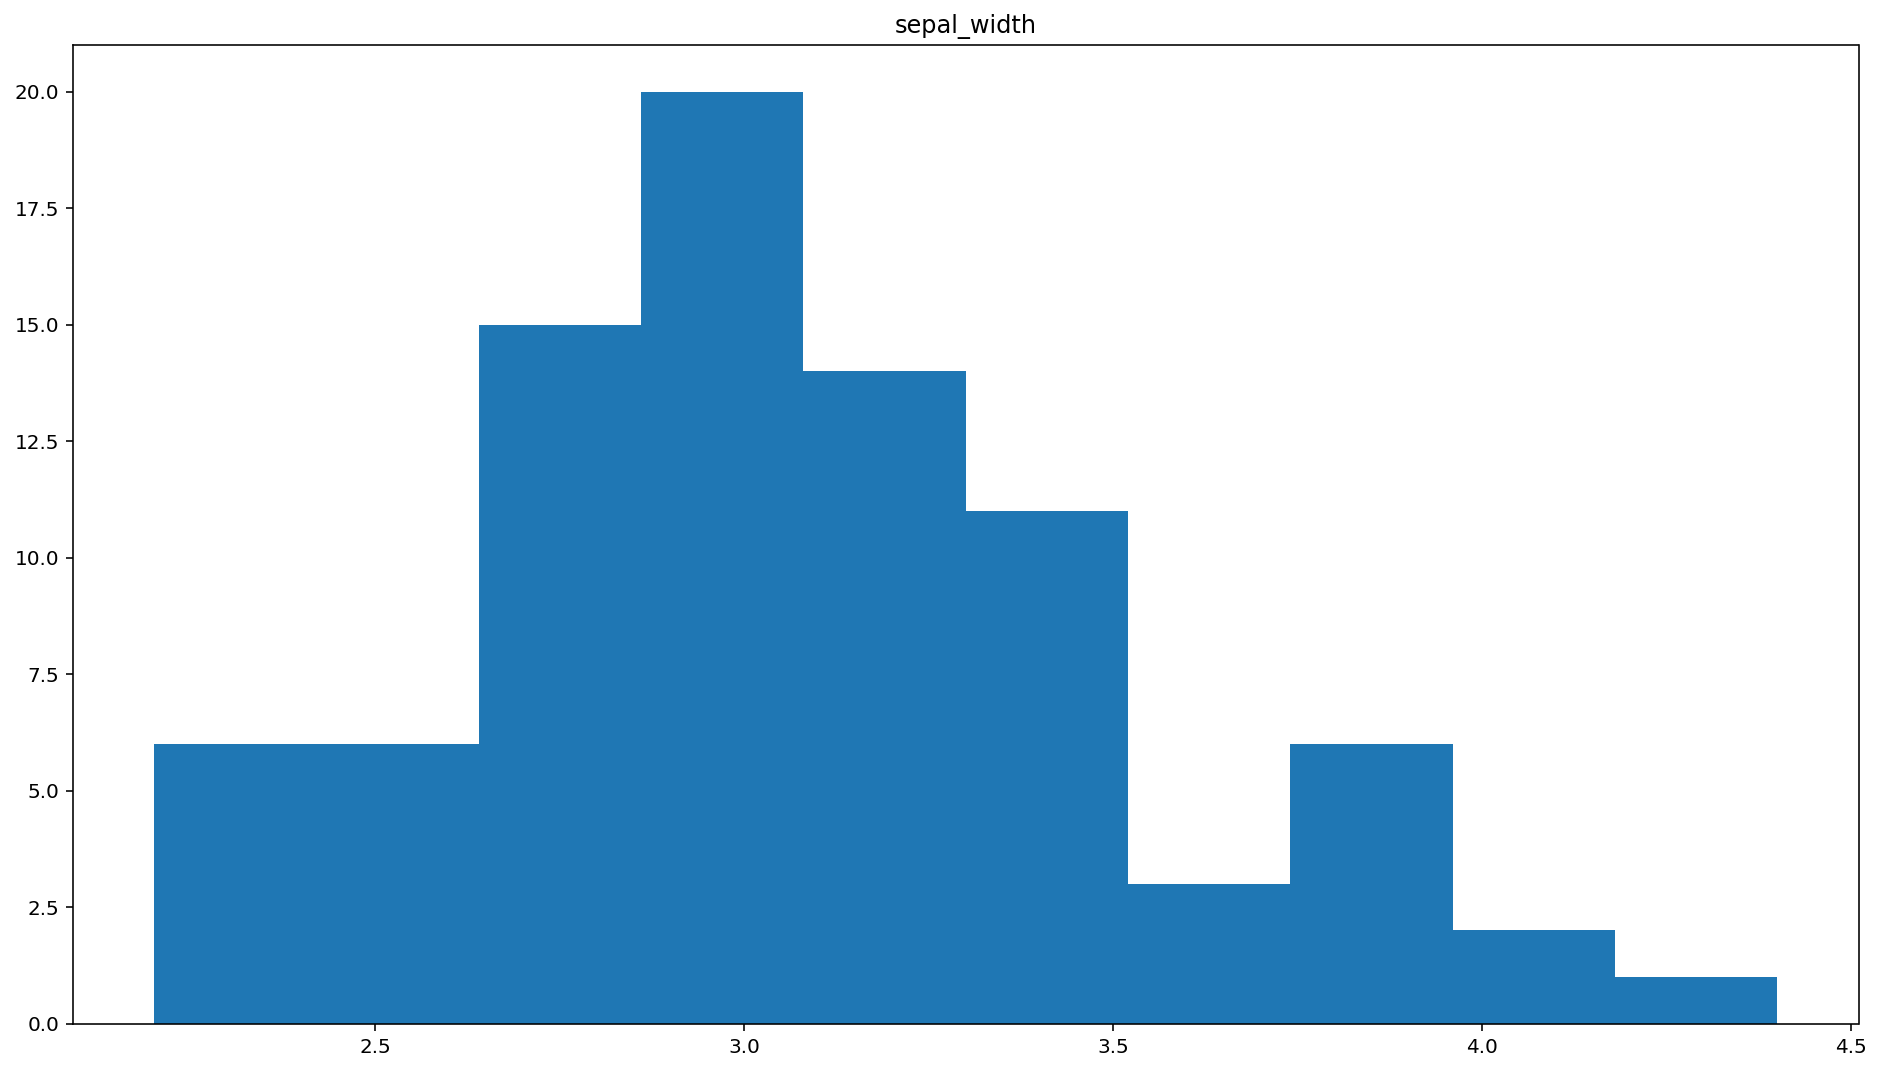

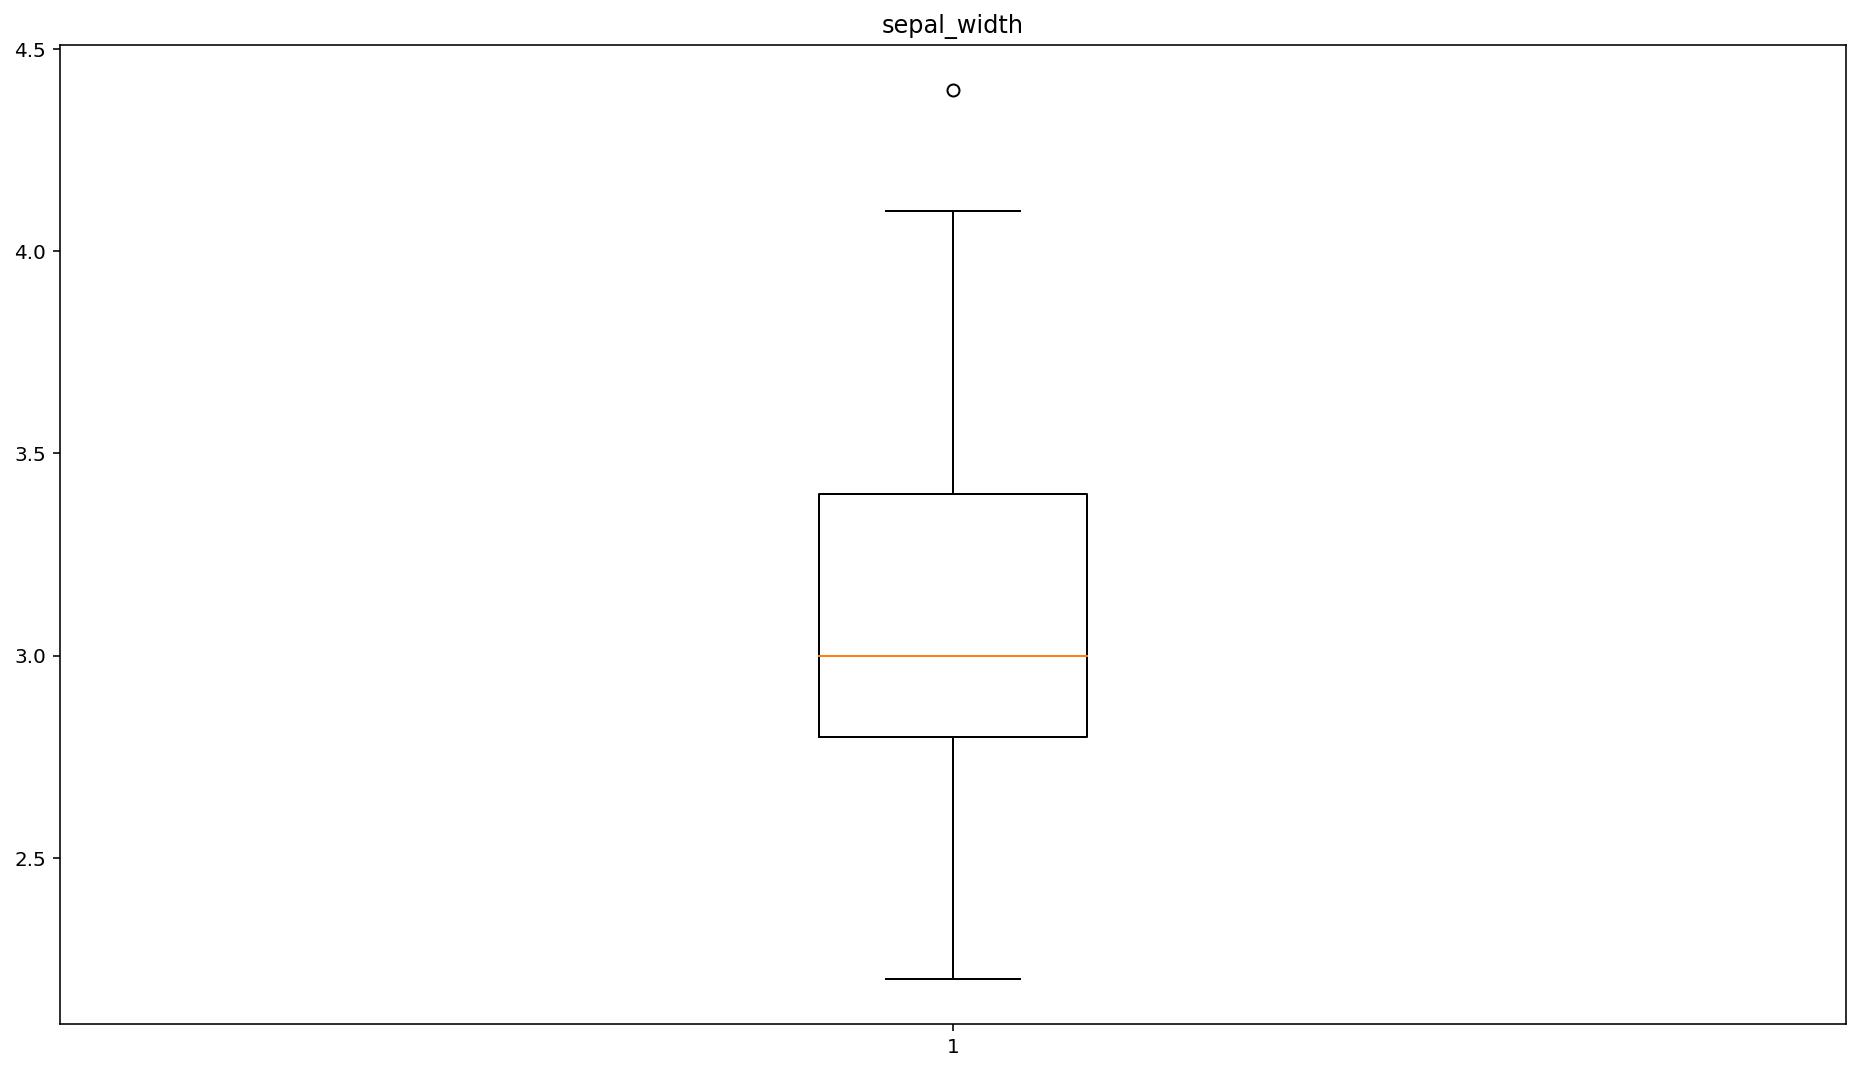

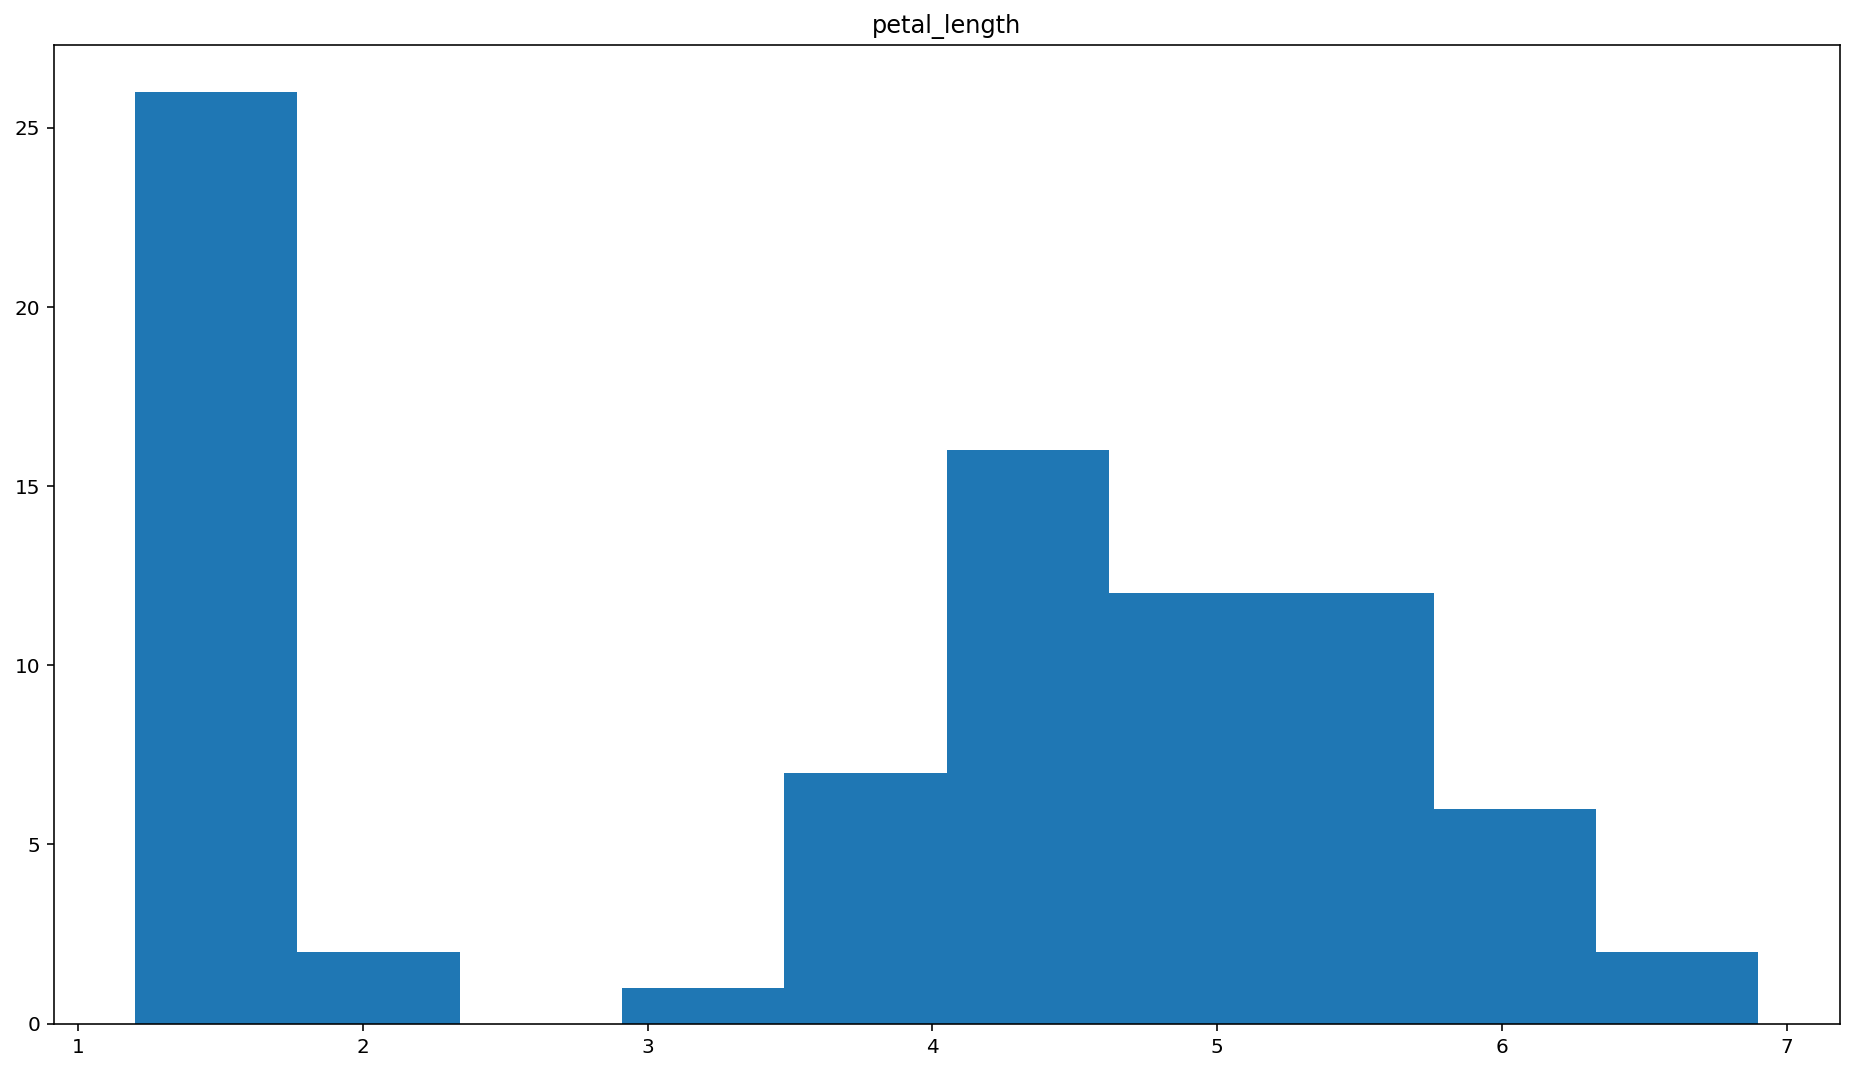

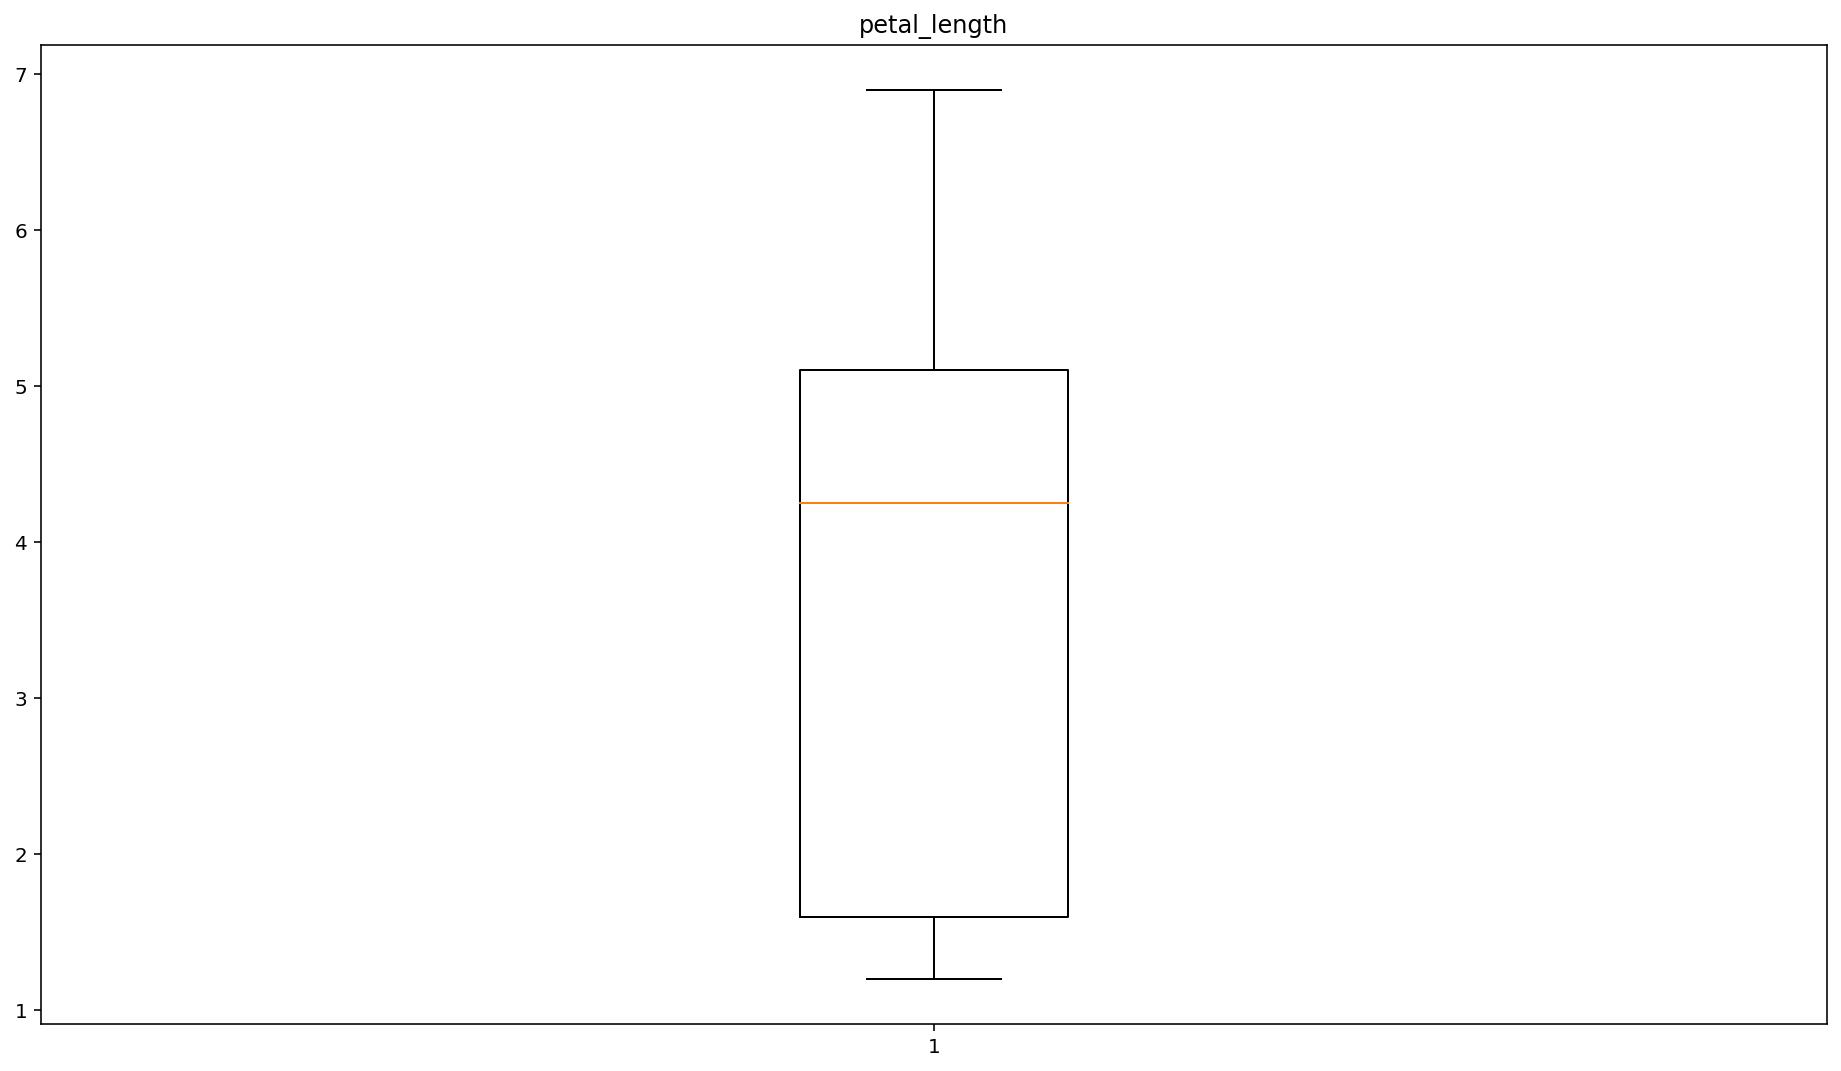

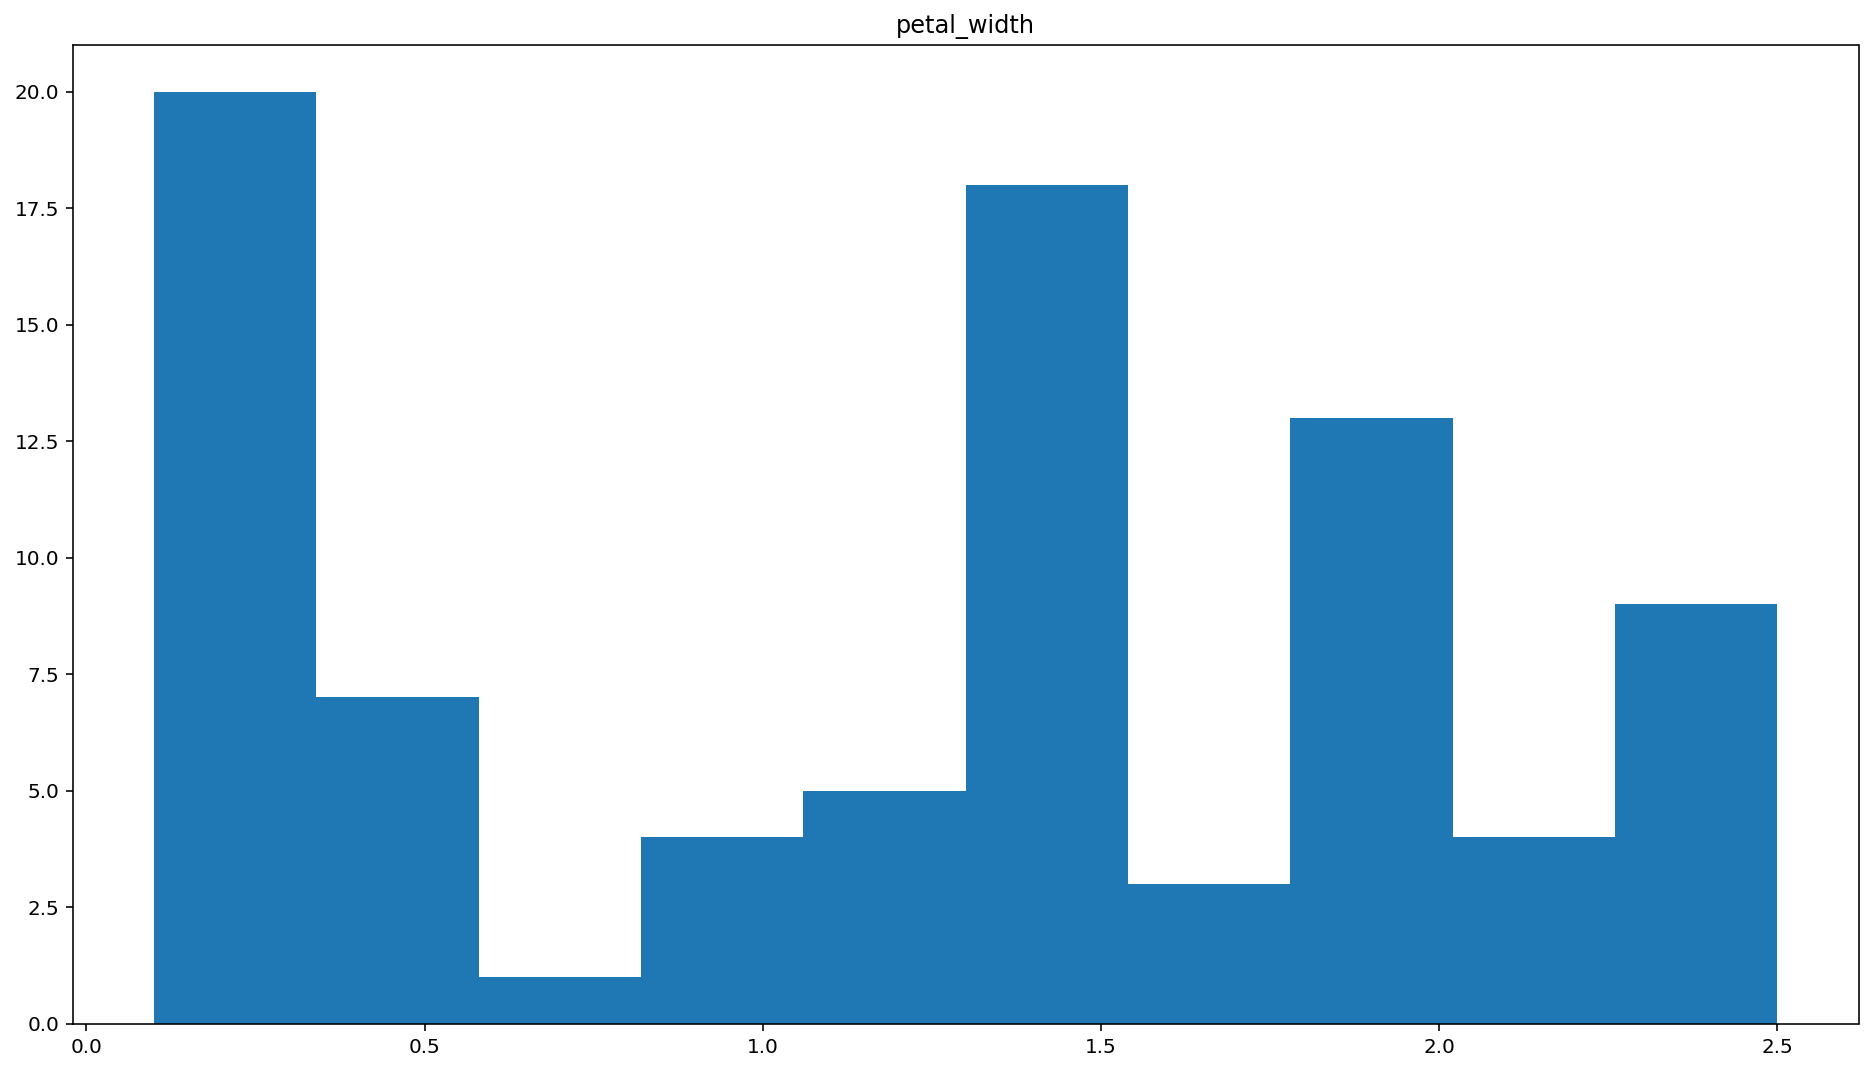

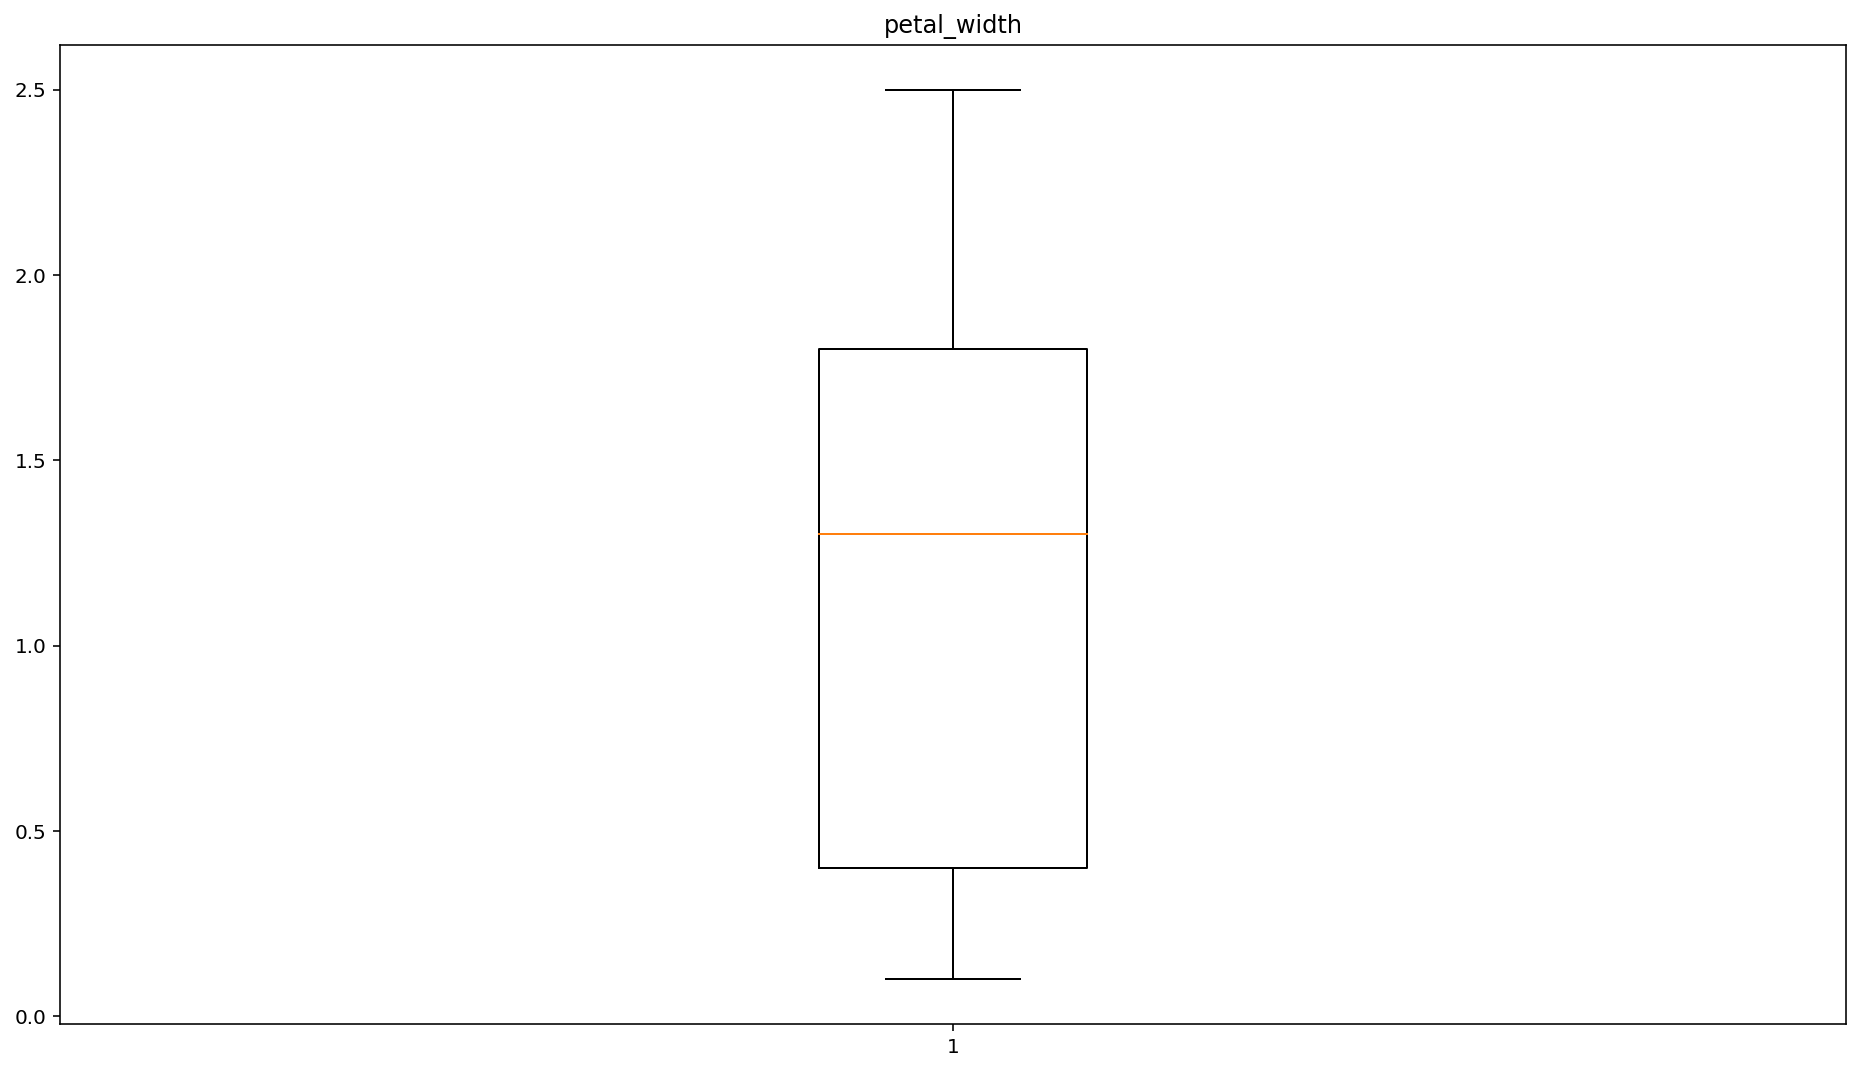

In [9]:
# Plot numeric columns
num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [10]:
train.species.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

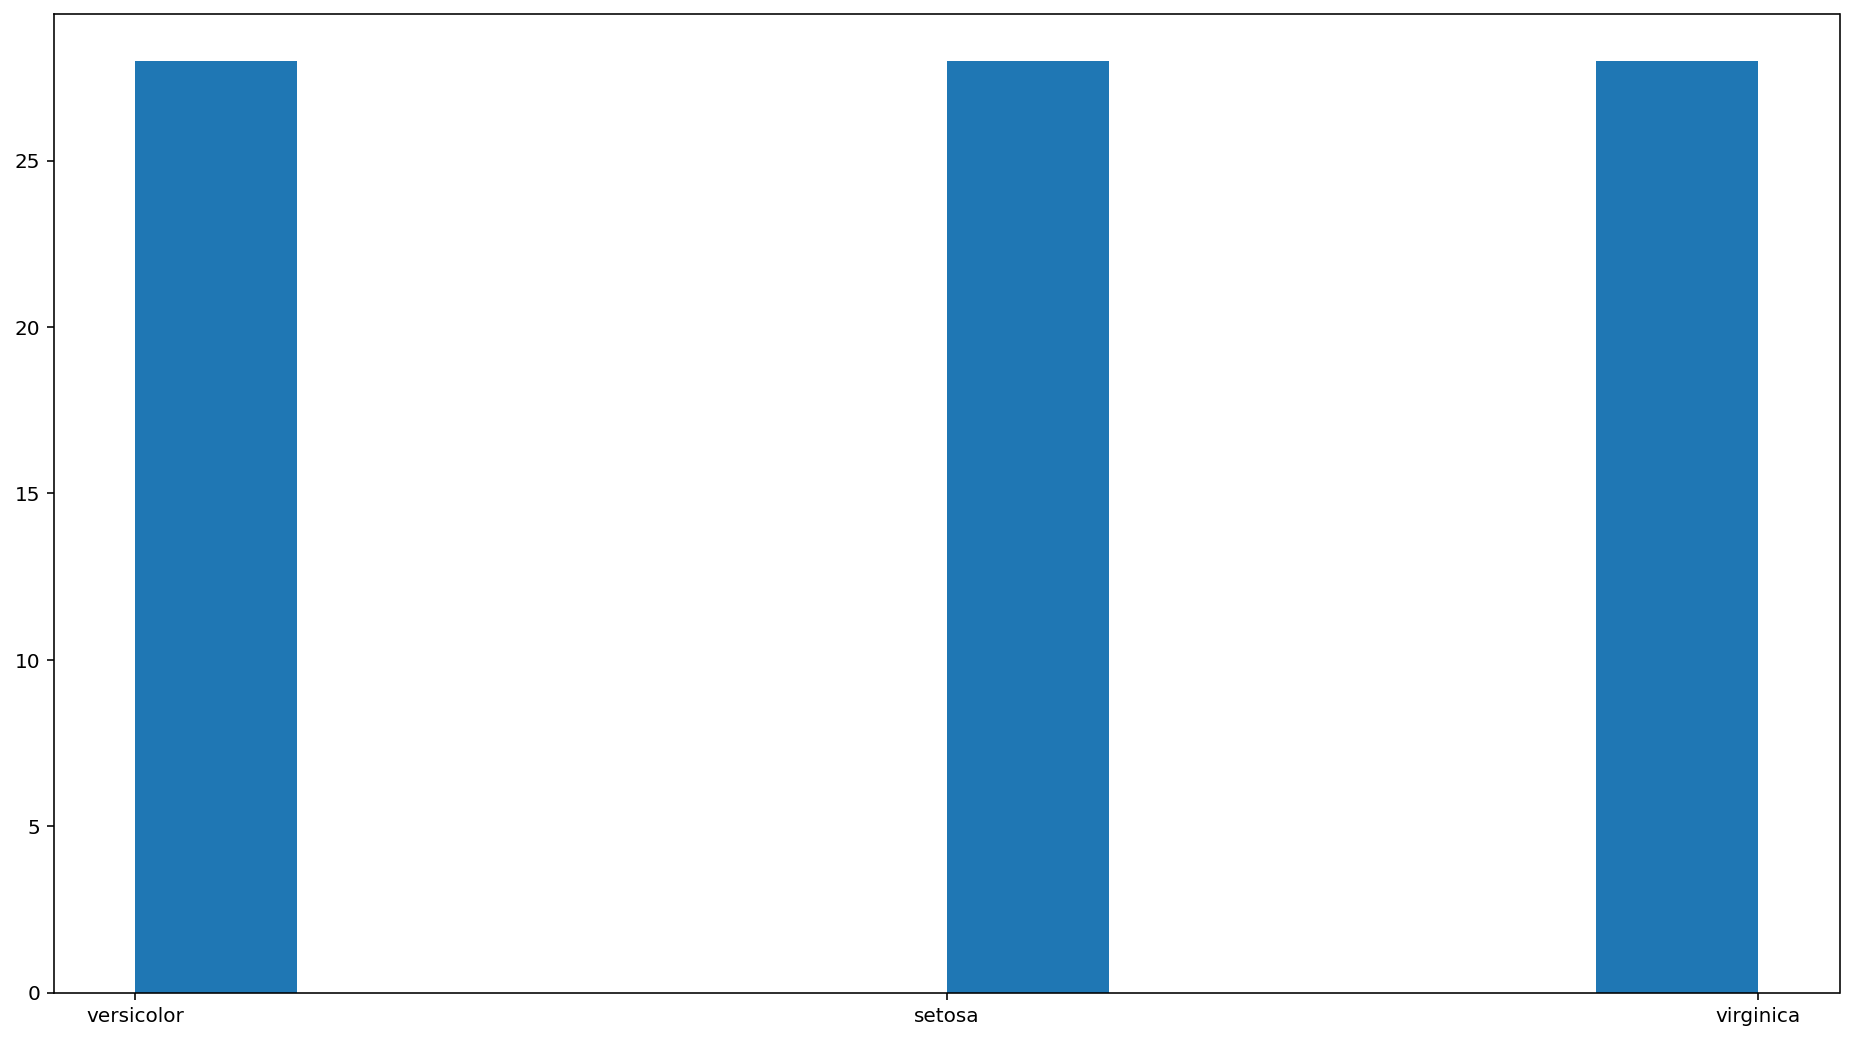

In [11]:
plt.hist(train.species)

### 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

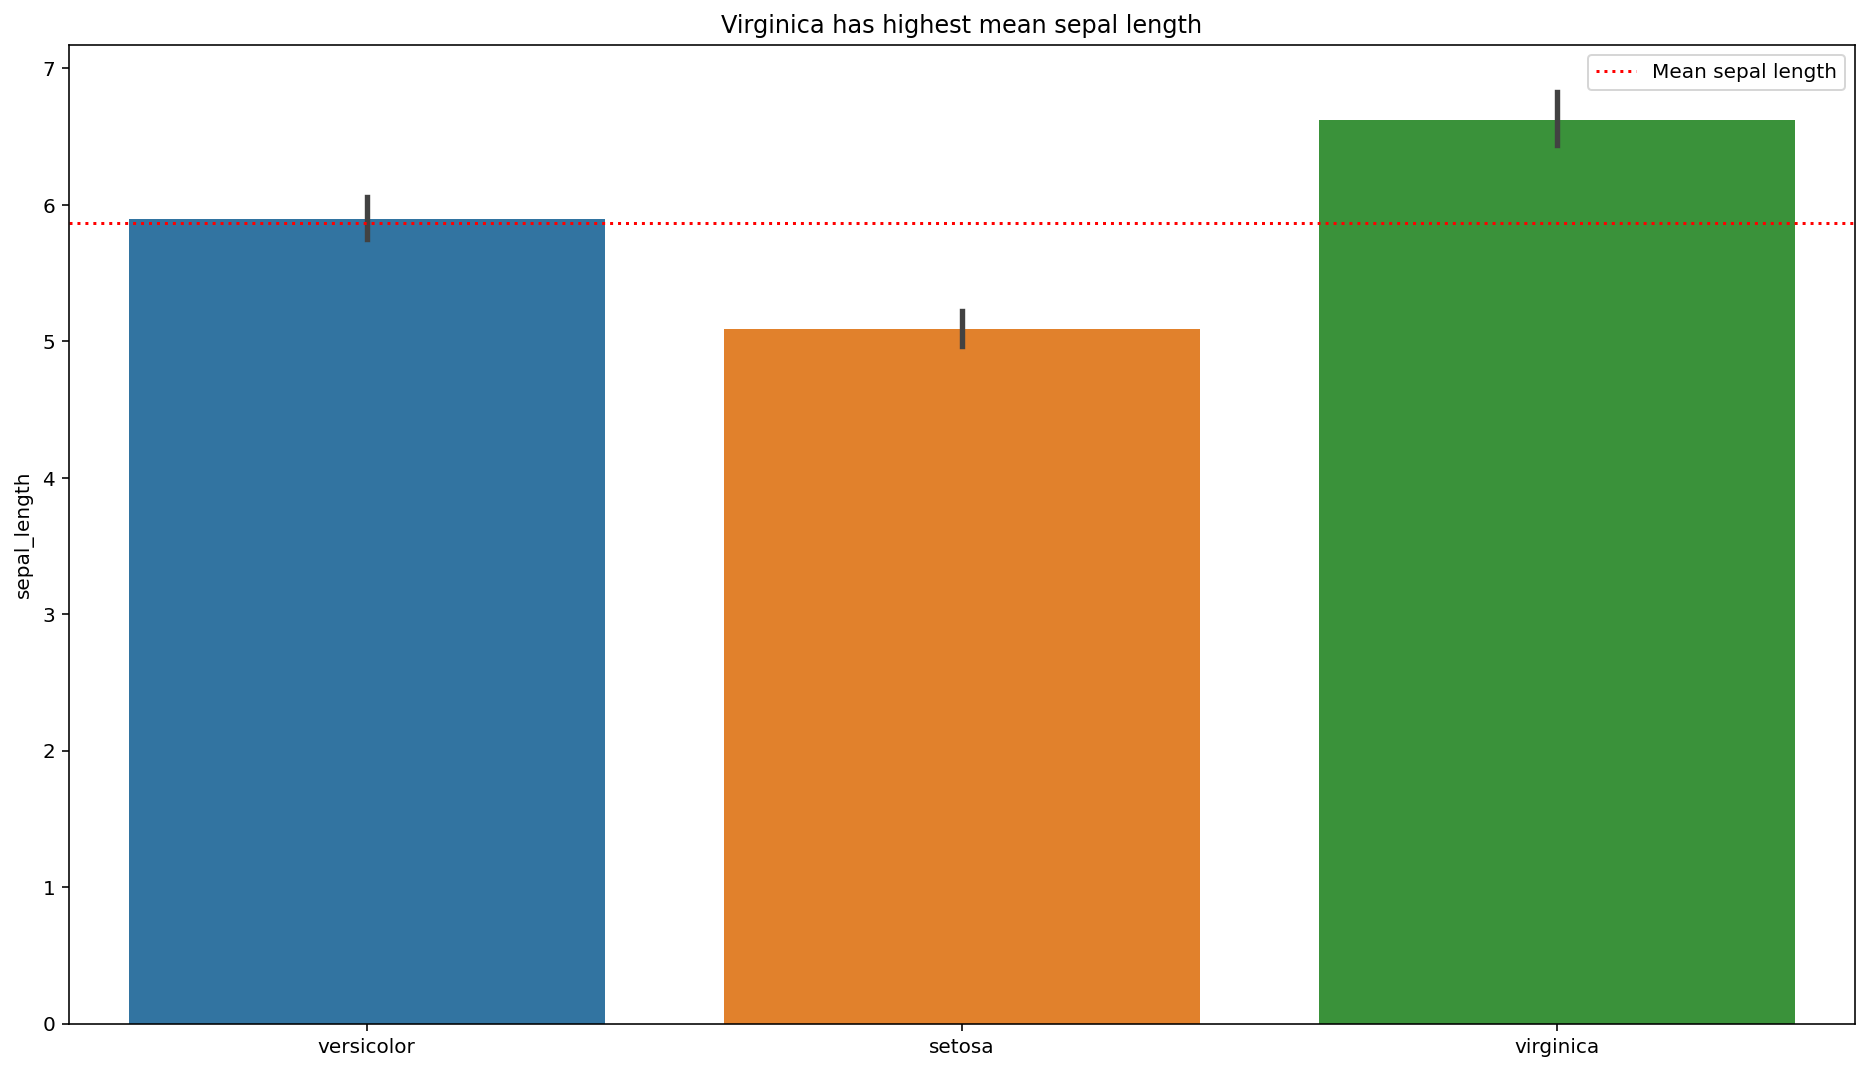

In [12]:
plt.title("Virginica has highest mean sepal length")
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

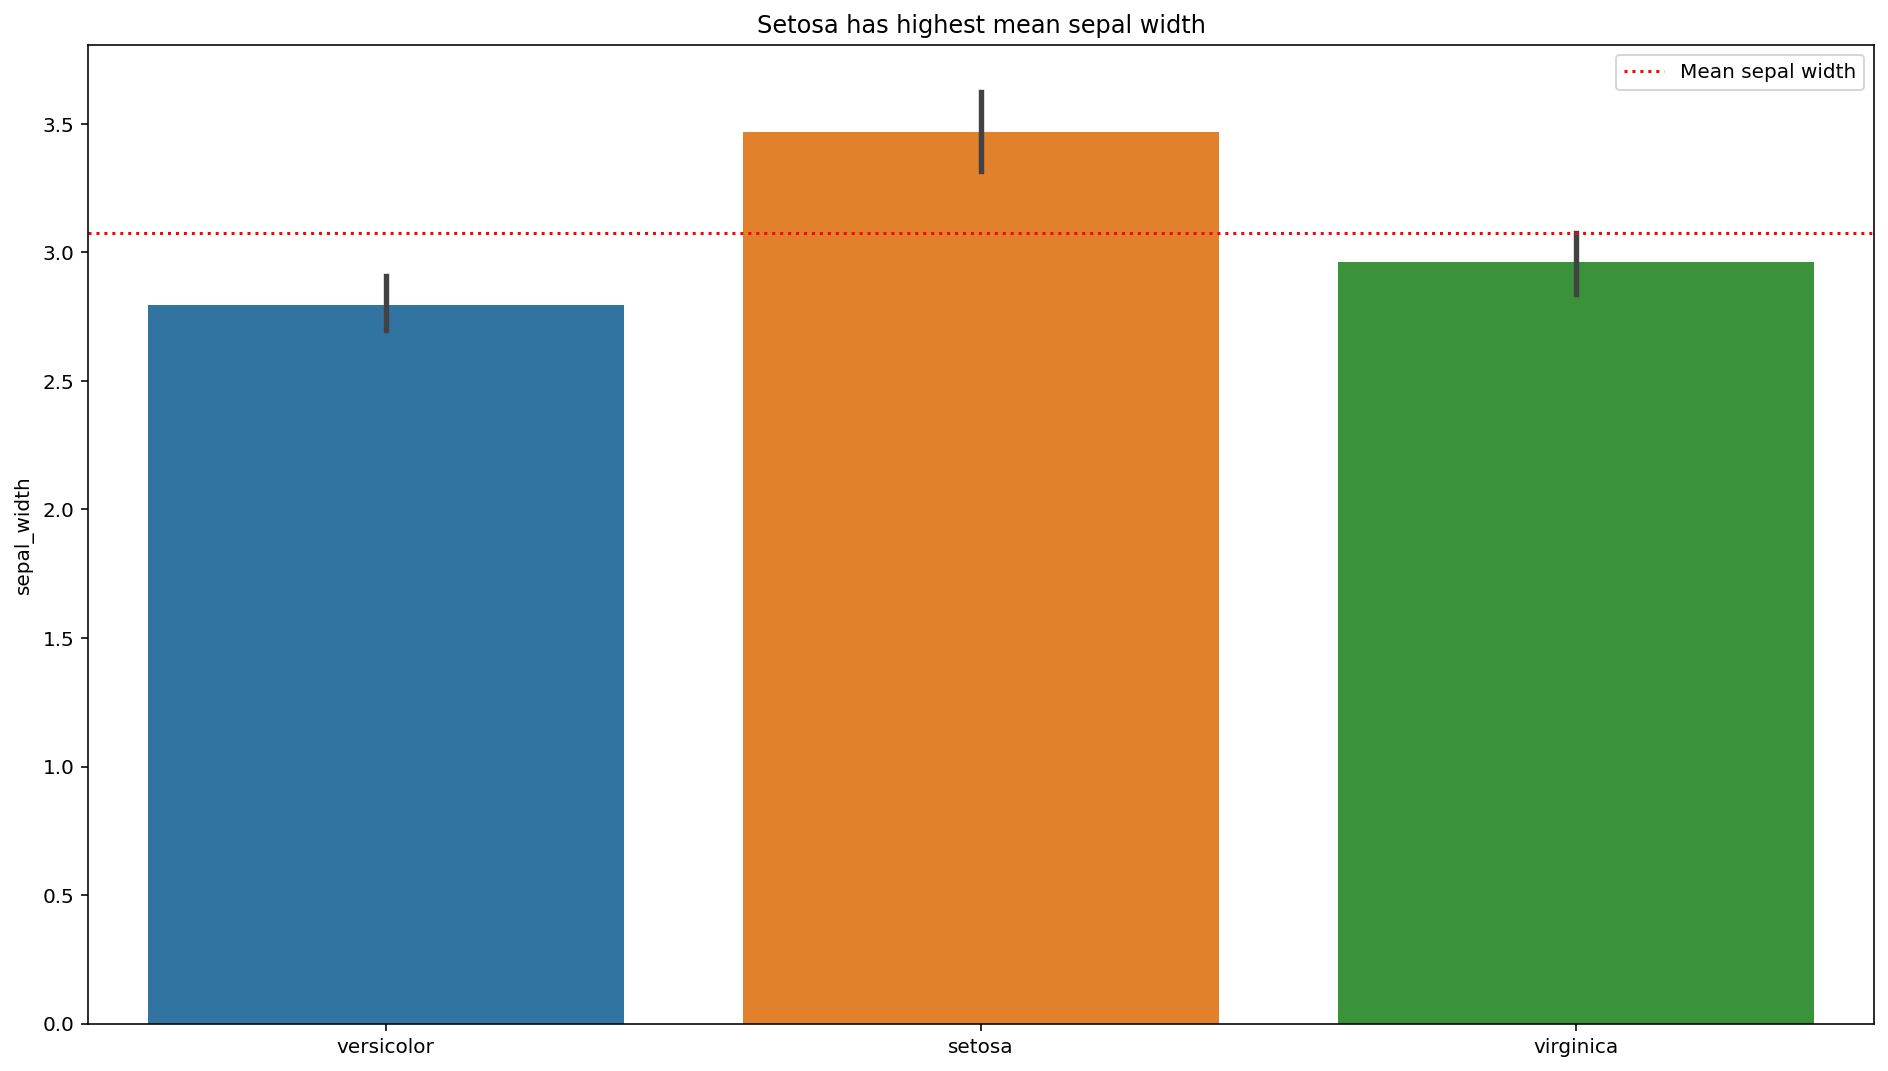

In [13]:
plt.title("Setosa has highest mean sepal width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

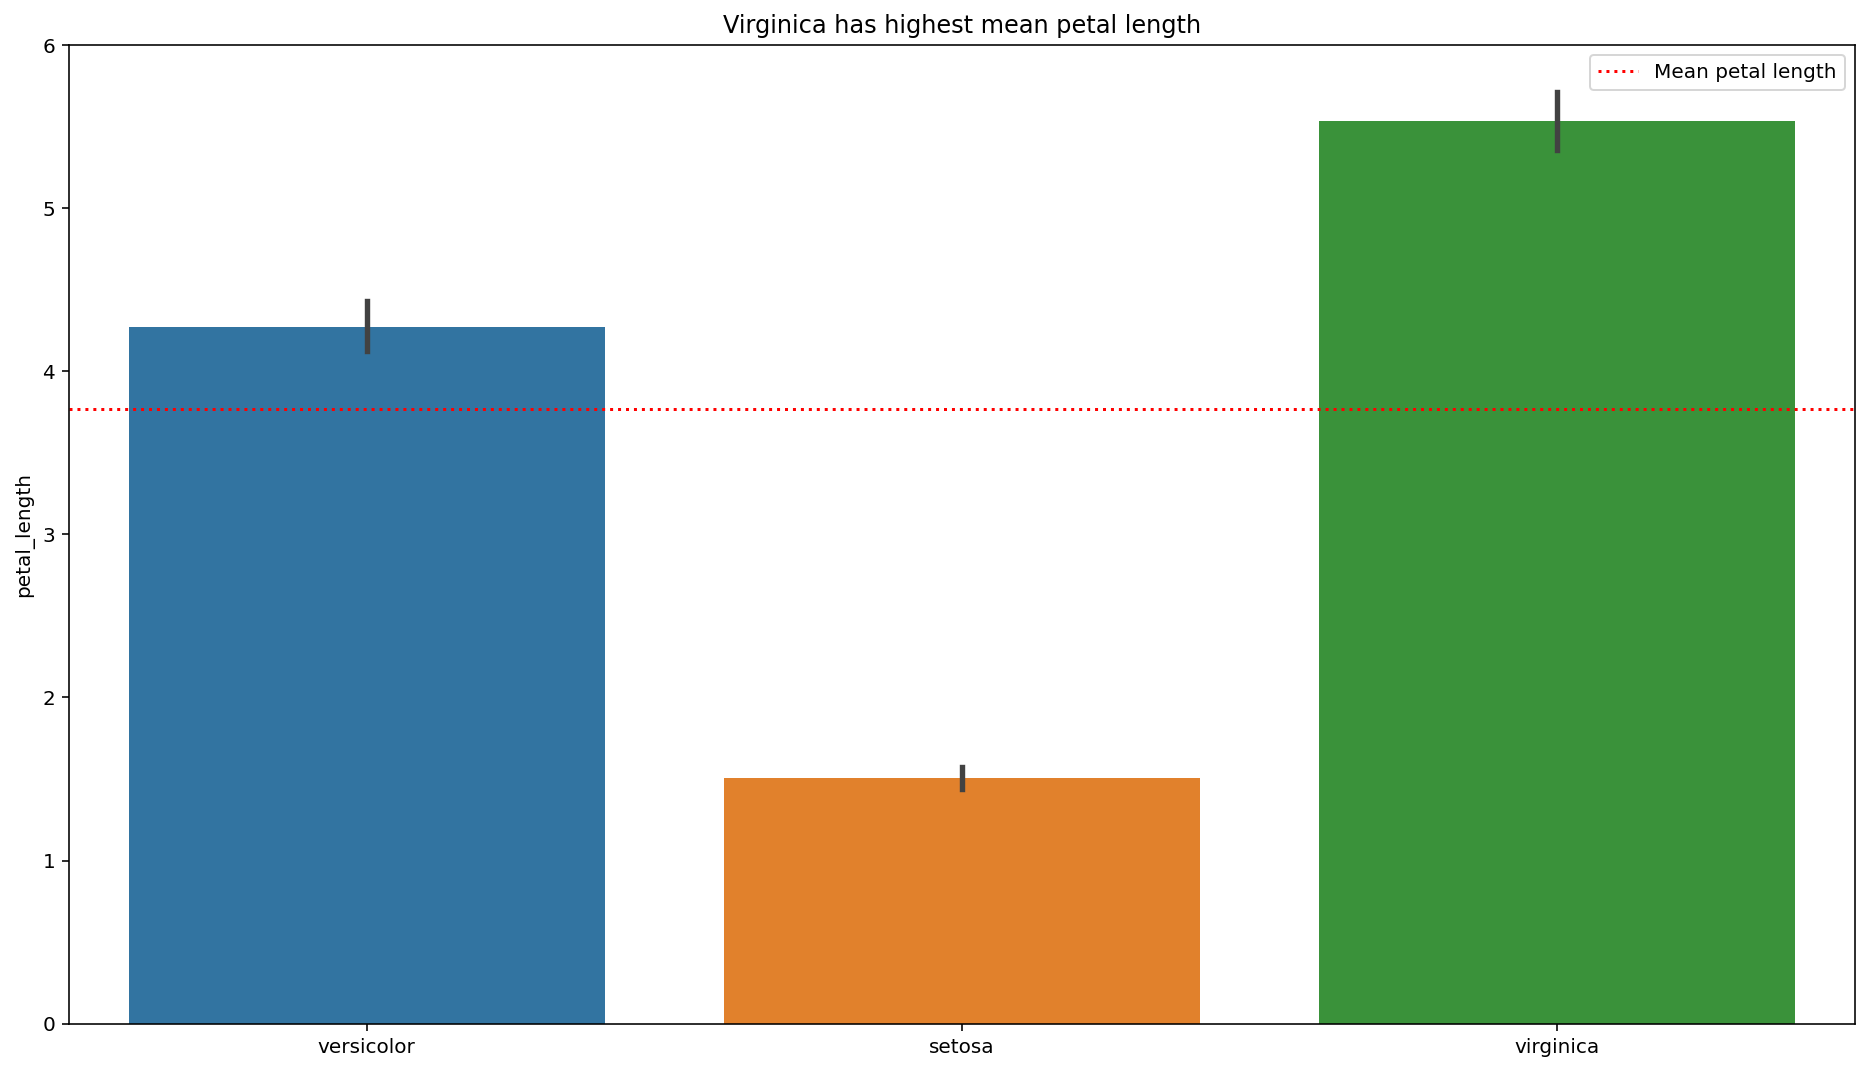

In [14]:
plt.title("Virginica has highest mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

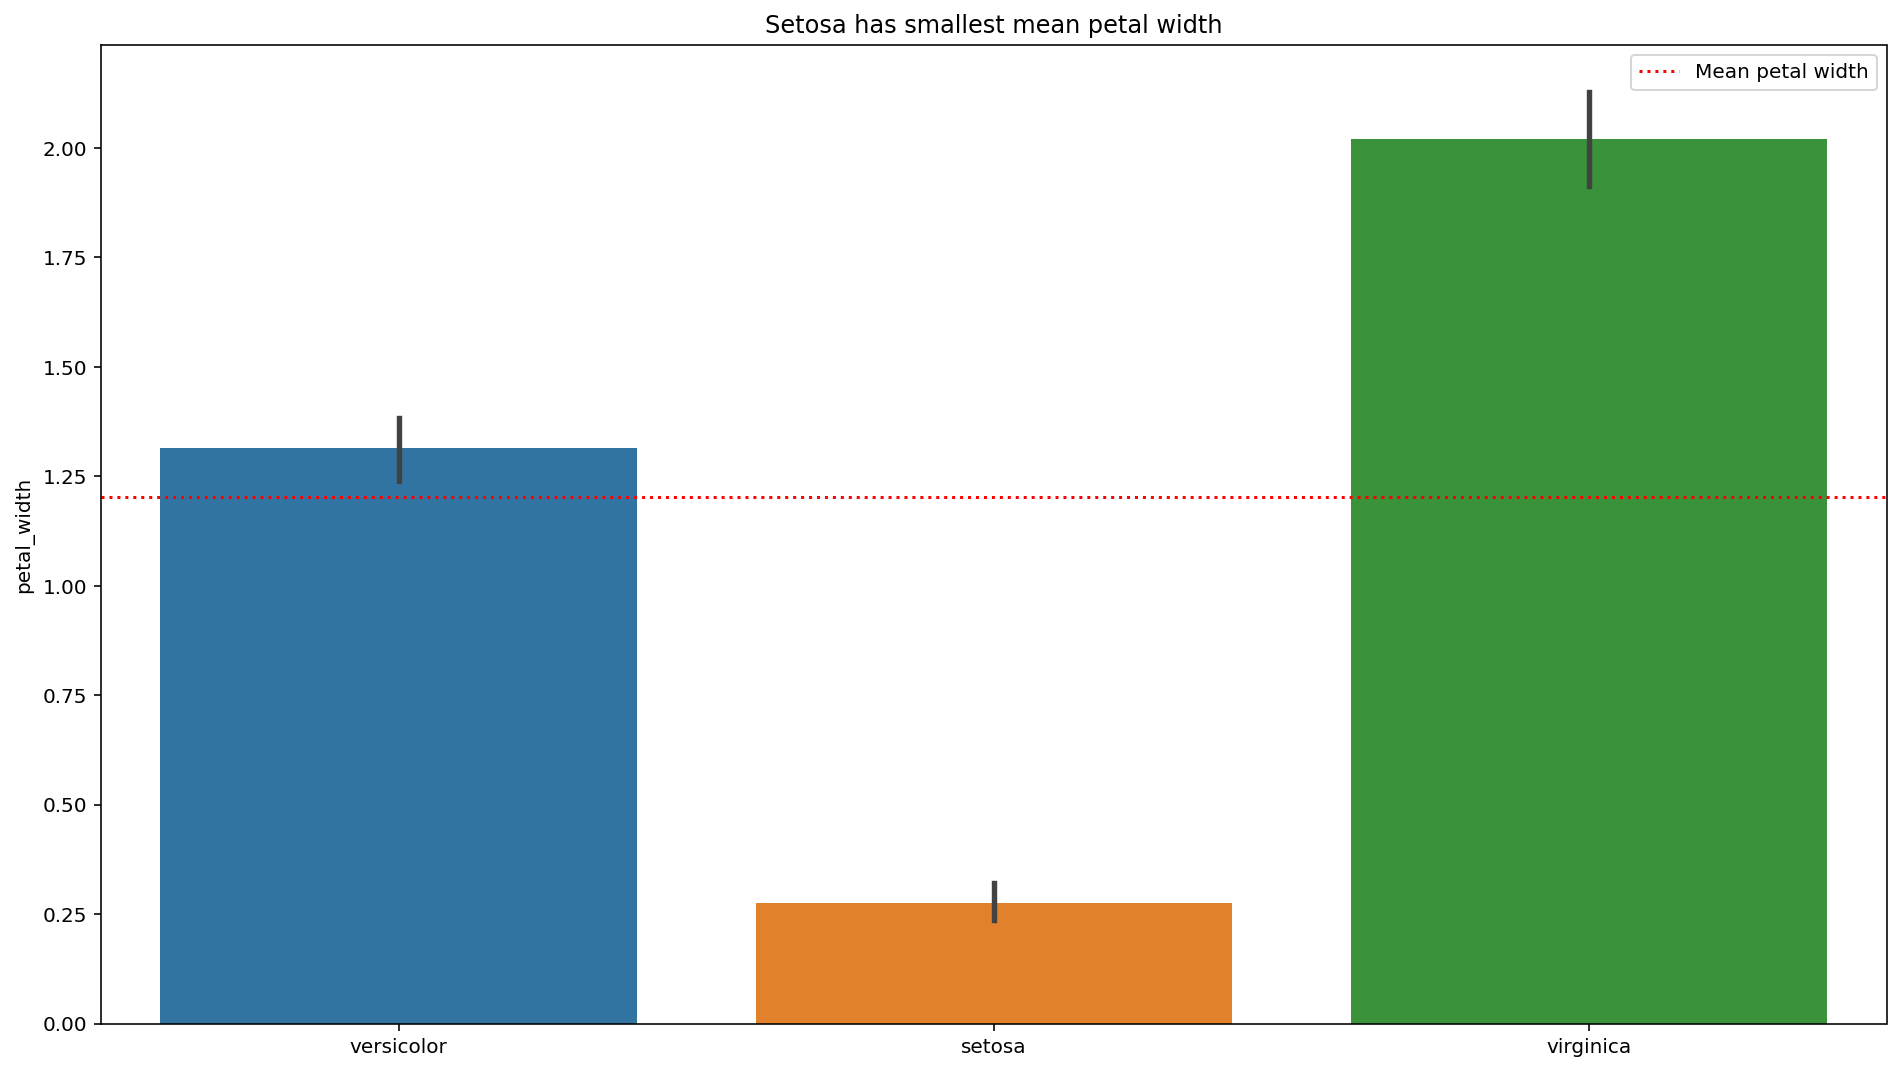

In [15]:
plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [16]:
train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [17]:
train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][train.species == 'setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.00000
mean,5.089286,3.467857,1.507143,0.27500
std,0.360390,0.427788,0.184448,0.12057
min,4.400000,2.300000,1.200000,0.10000
25%,4.875000,3.275000,1.400000,0.20000
50%,5.000000,3.400000,1.500000,0.20000
75%,5.400000,3.800000,1.600000,0.40000
max,5.800000,4.400000,1.900000,0.60000


In [18]:
train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']][train.species == 'versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.896429,2.796429,4.271429,1.314286
std,0.425556,0.280848,0.409930,0.199470
min,4.900000,2.300000,3.300000,1.000000
25%,5.600000,2.600000,4.000000,1.200000
50%,5.800000,2.800000,4.250000,1.300000
75%,6.125000,3.000000,4.525000,1.500000
max,6.900000,3.400000,5.100000,1.800000


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [19]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="two-sided")
t, p

(767.0, 6.47119166980993e-10)

In [20]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="two-sided")
    print(f'Comparing {var} between virginica and versicolor')
    print('t-stat', t)
    print('p:', p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
t-stat 676.5
p: 3.082029196534108e-06
------------------


Comparing sepal_width between virginica and versicolor
t-stat 510.0
p: 0.05257259139845694
------------------


Comparing petal_length between virginica and versicolor
t-stat 776.5
p: 2.9479835715150625e-10
------------------


Comparing petal_width between virginica and versicolor
t-stat 767.0
p: 6.47119166980993e-10
------------------




**Takeaways** 
- petal_length and petal_width show the most seperation between species.
- Could petal and sepal area be useful features? 
- viginica iris have the largest petals. 
- setosa iris have the smallest petals. 
- setosa seem to have wide & short sepals. 

### 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col


- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

In [21]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [22]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,0,1,0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,1,0,0,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,0,0,1,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,0,1,0,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,1,0,0,21.66,0.51


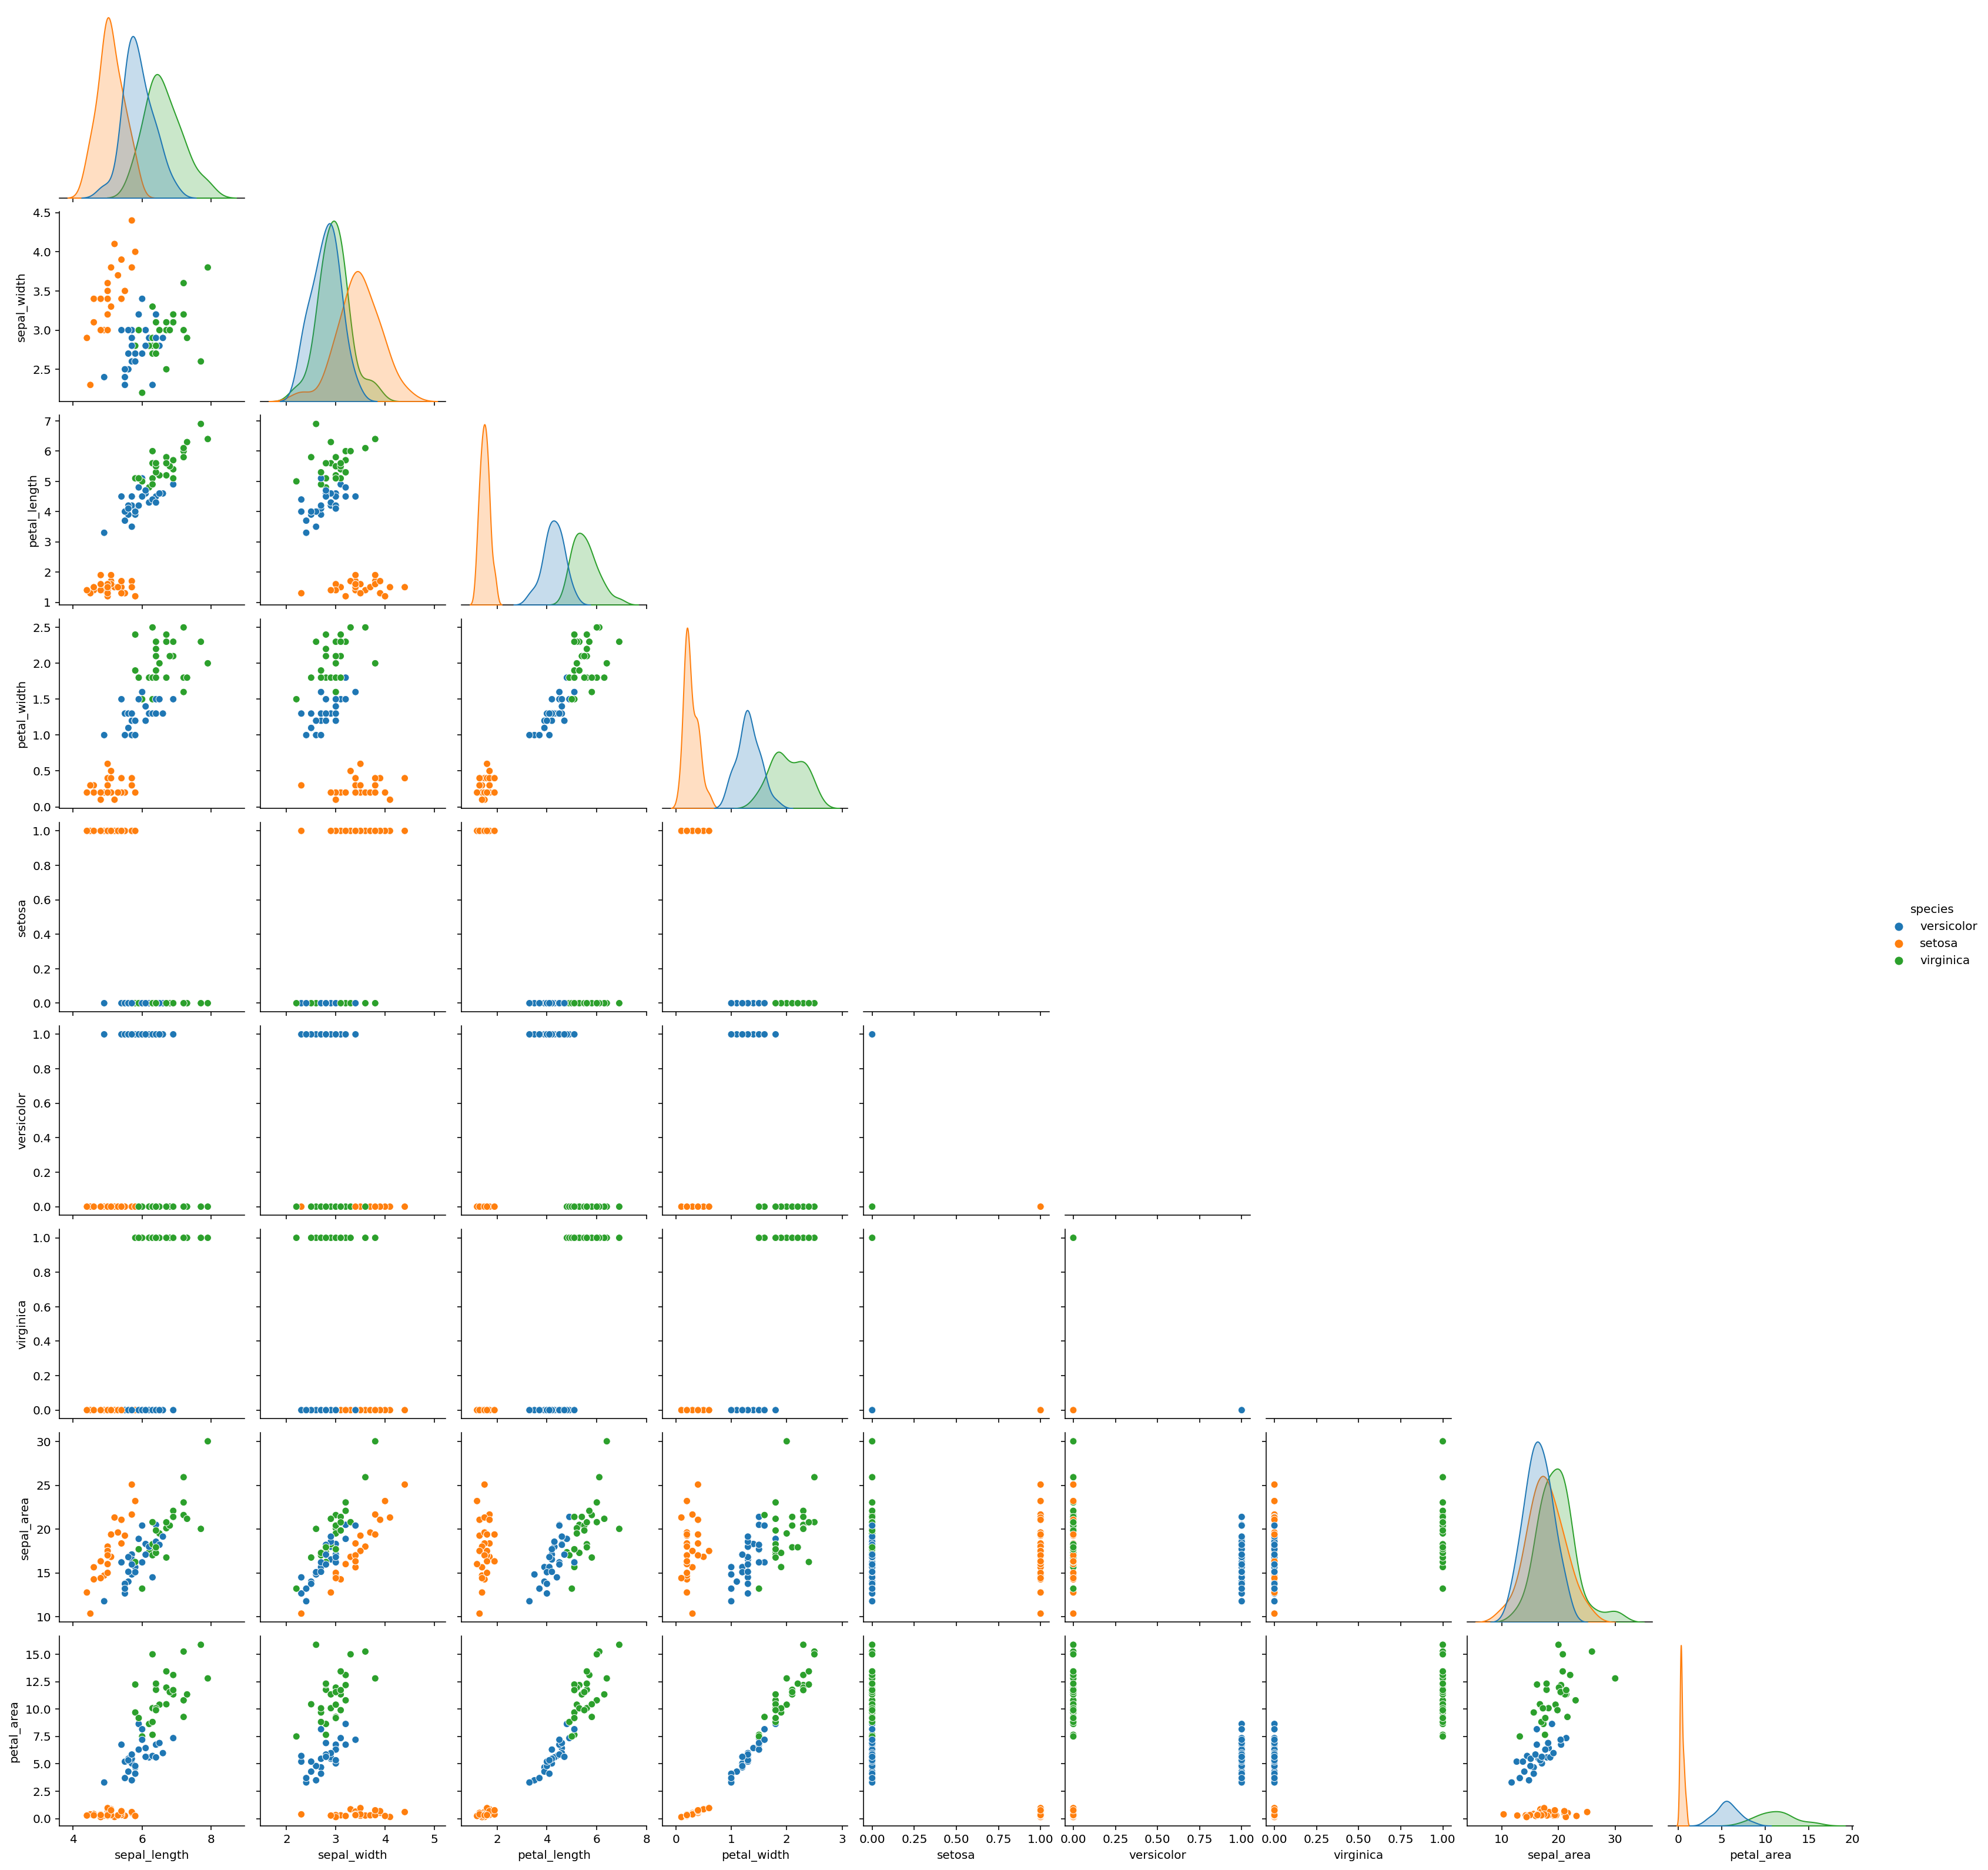

In [23]:
sns.pairplot(train, hue='species', corner=True)
plt.show()

In [24]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [25]:
combos[0]

('sepal_length', 'sepal_width')

In [26]:
train.groupby('species')['sepal_area'].sum()

species
setosa        497.30
versicolor    463.09
virginica     551.46
Name: sepal_area, dtype: float64

In [27]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

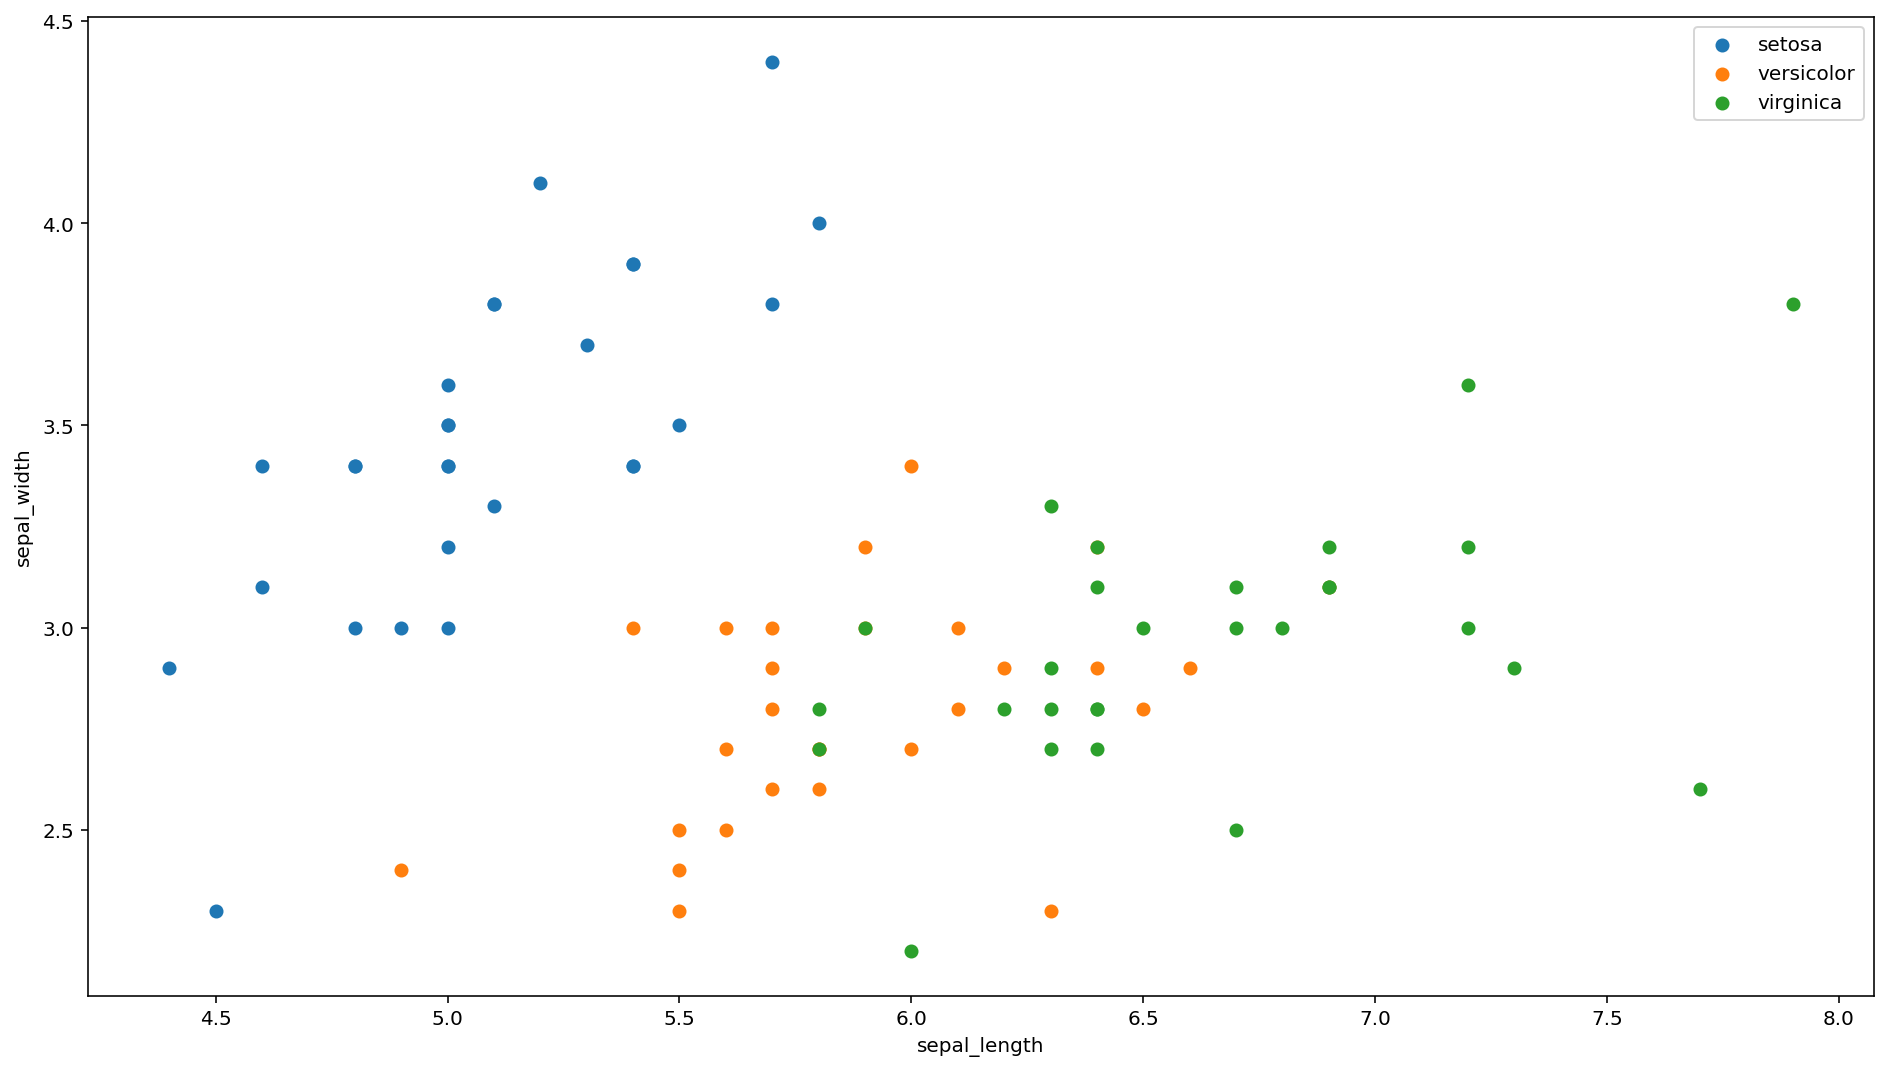

In [28]:
# test it with one plot
scatter_species(x,y)

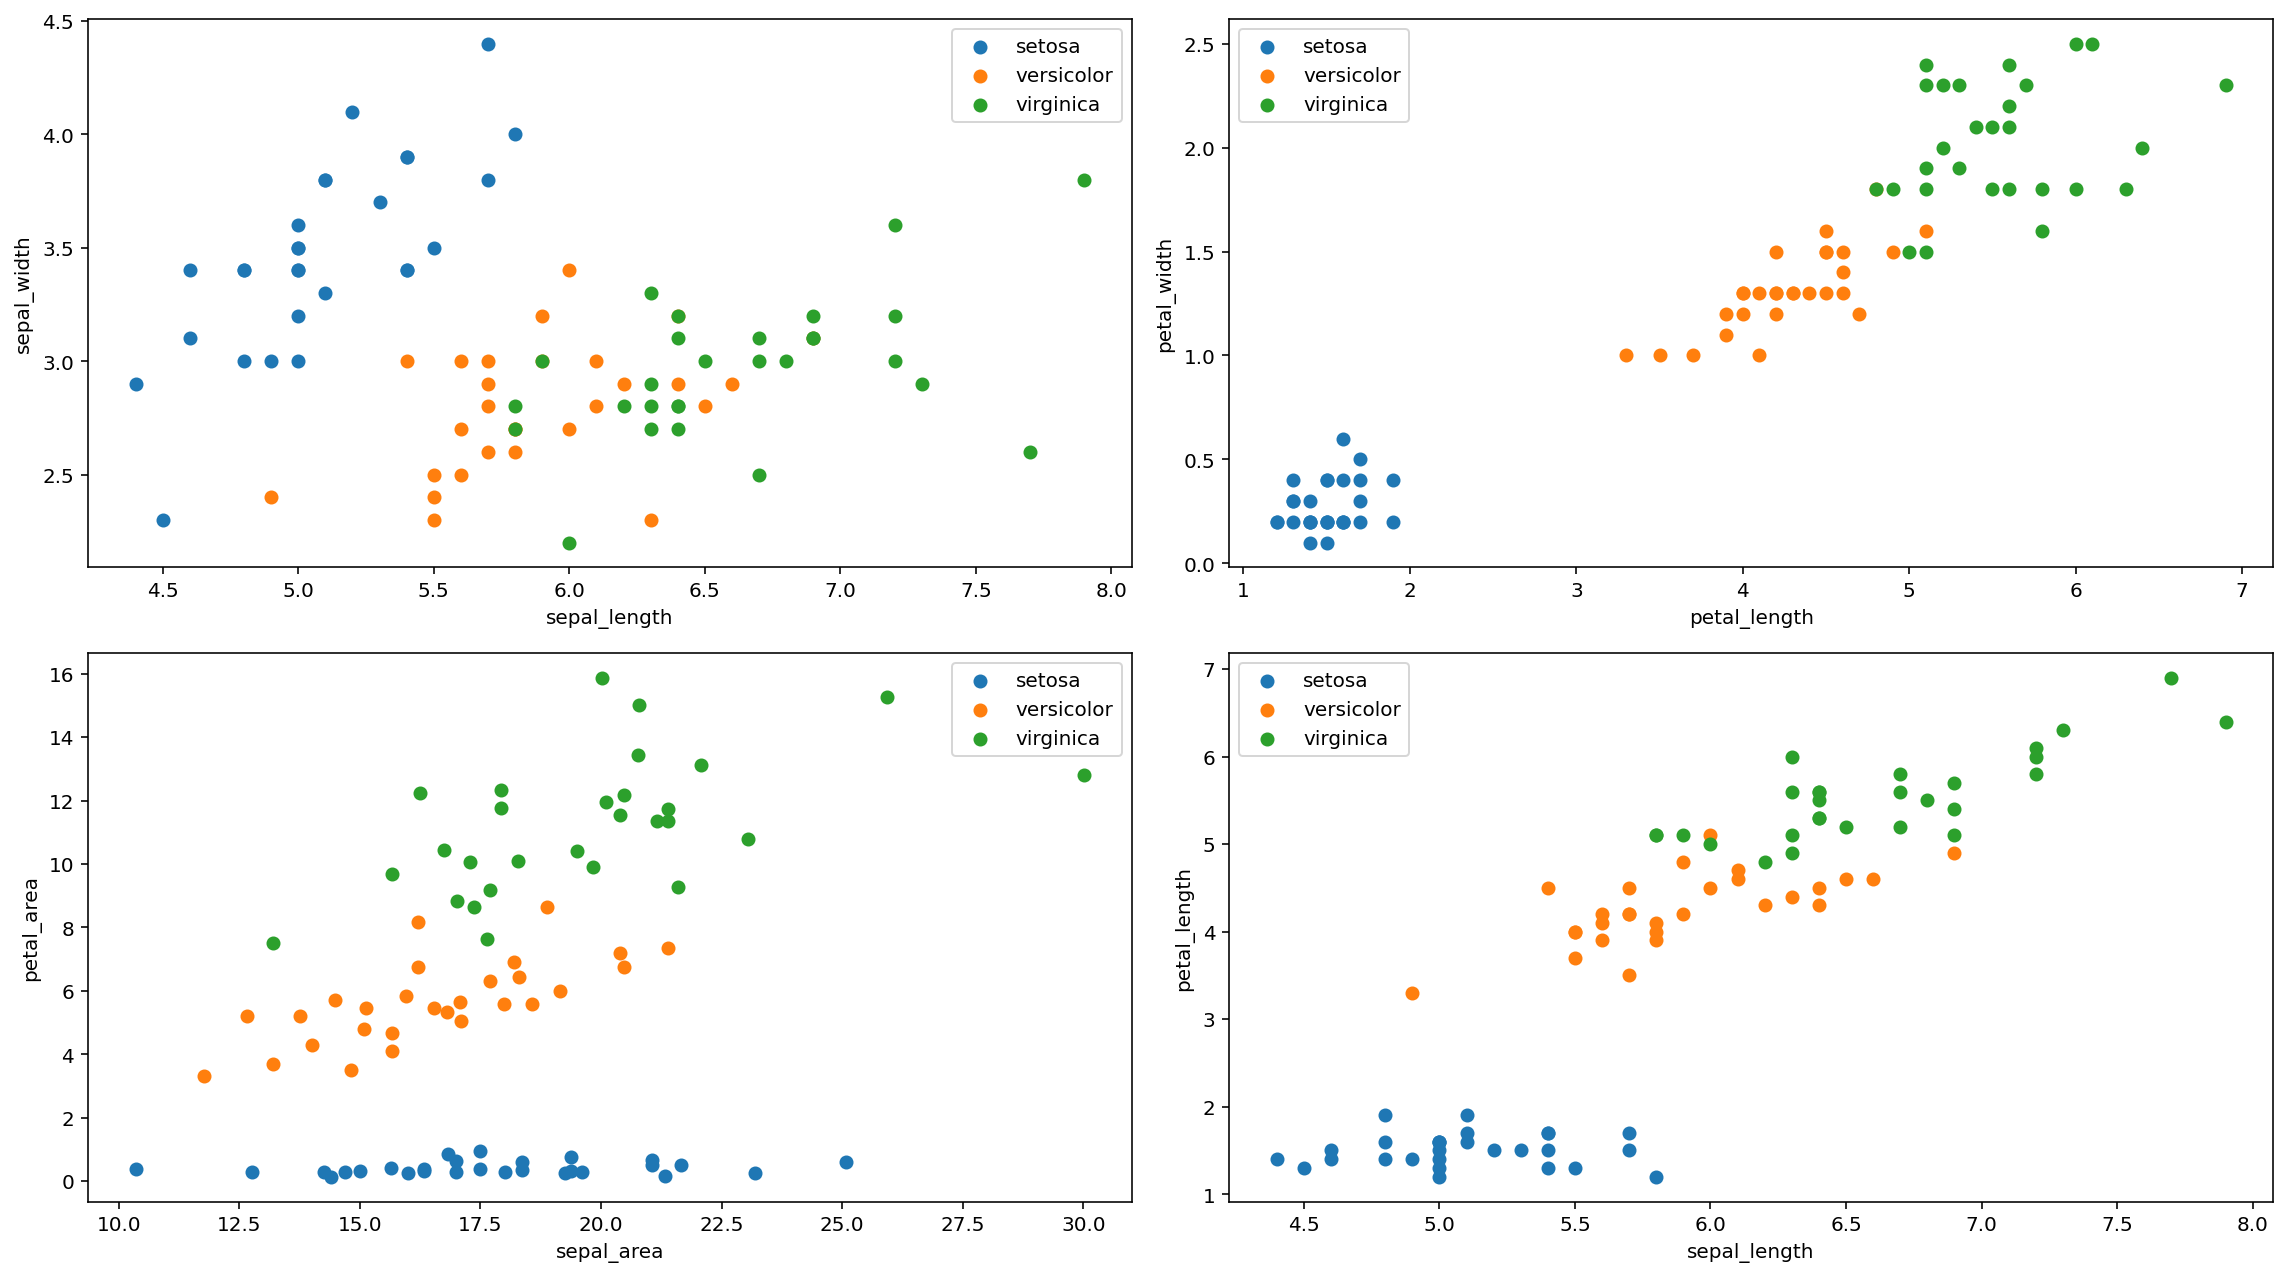

In [29]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

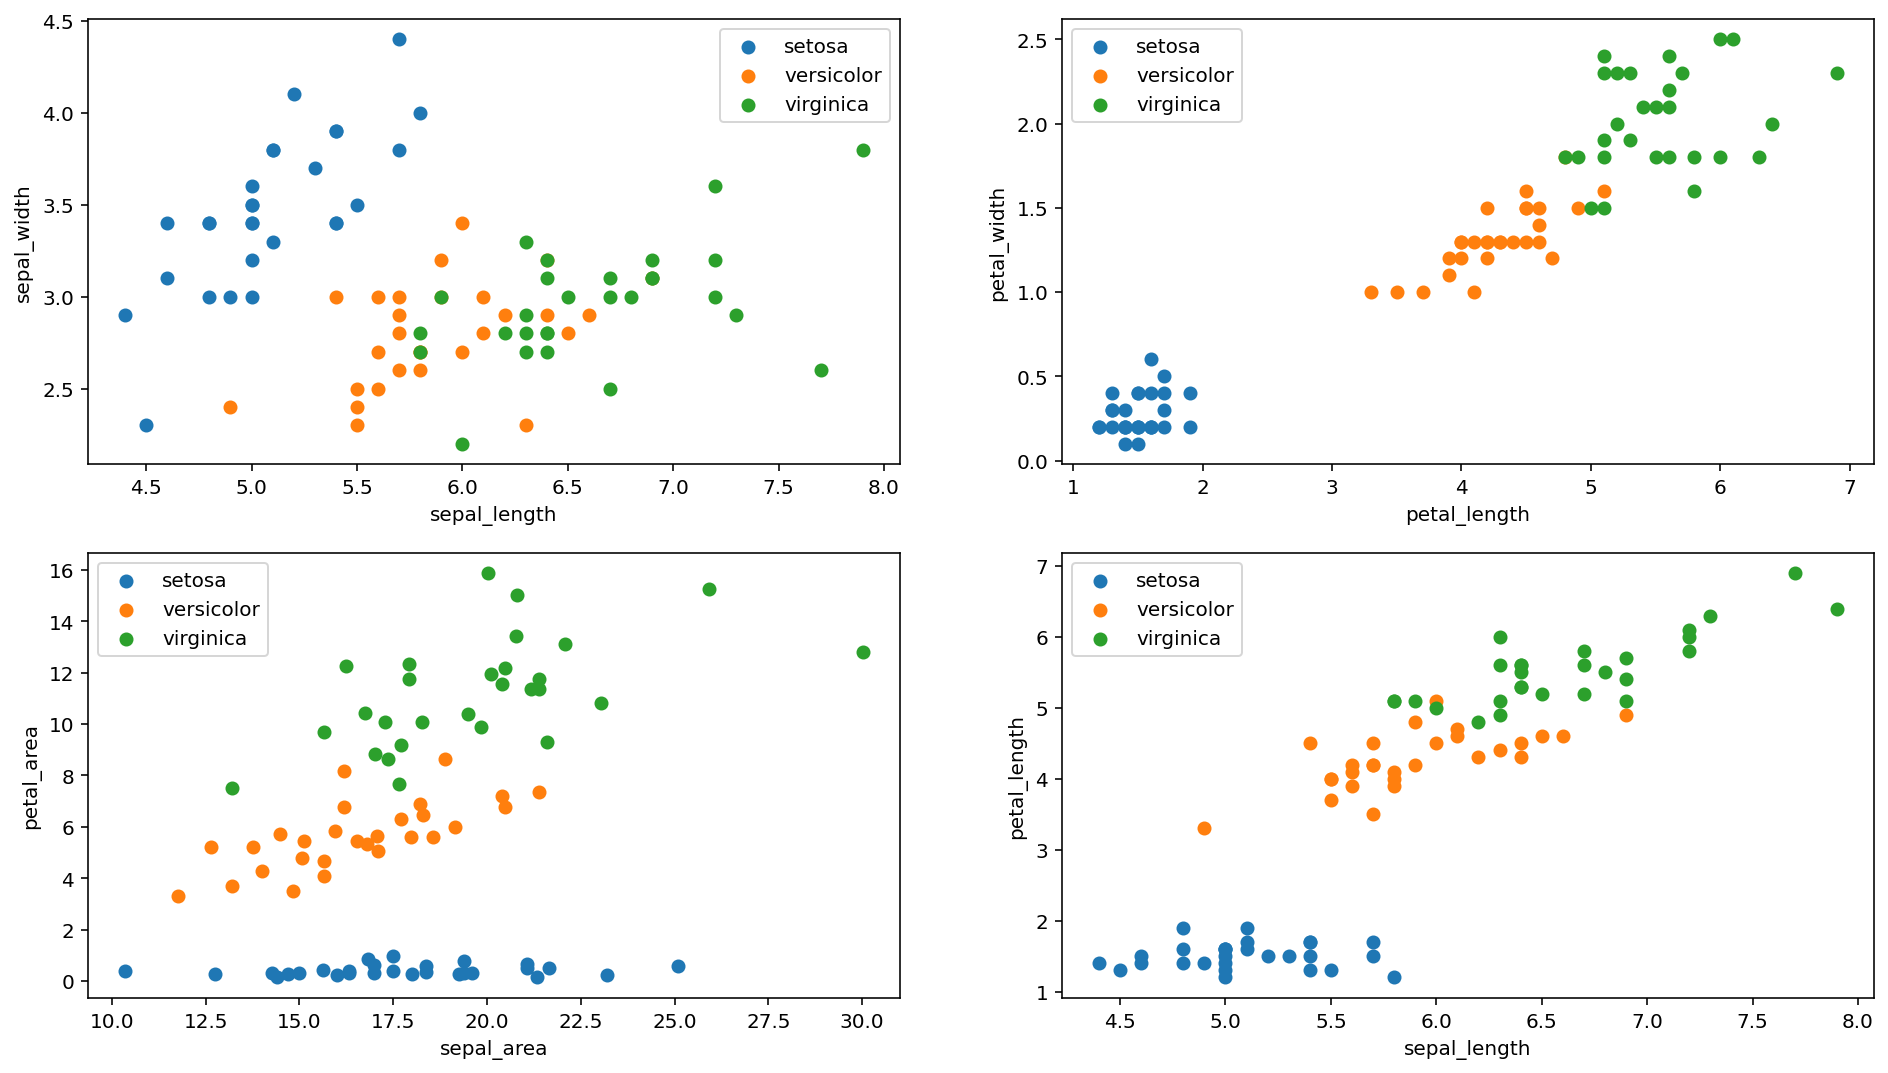

In [30]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

**Takeaways**

- sepal_length is useful, sepal_width not great but likely adds some value. 
- petal_area is very useful, as we would expect given the previous plot of petal_width x petal length. 
- sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton. 

A heatmap of each variable layering correlation coefficient on top.

*n.b. Please do not put a heatmap with all correlation coefficients labeled as is in a presentation! A heatmap can be useful with minimal detail included. Maybe adding extreme values labeled. But not like this! This is for YOUR exploration.*

#### Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

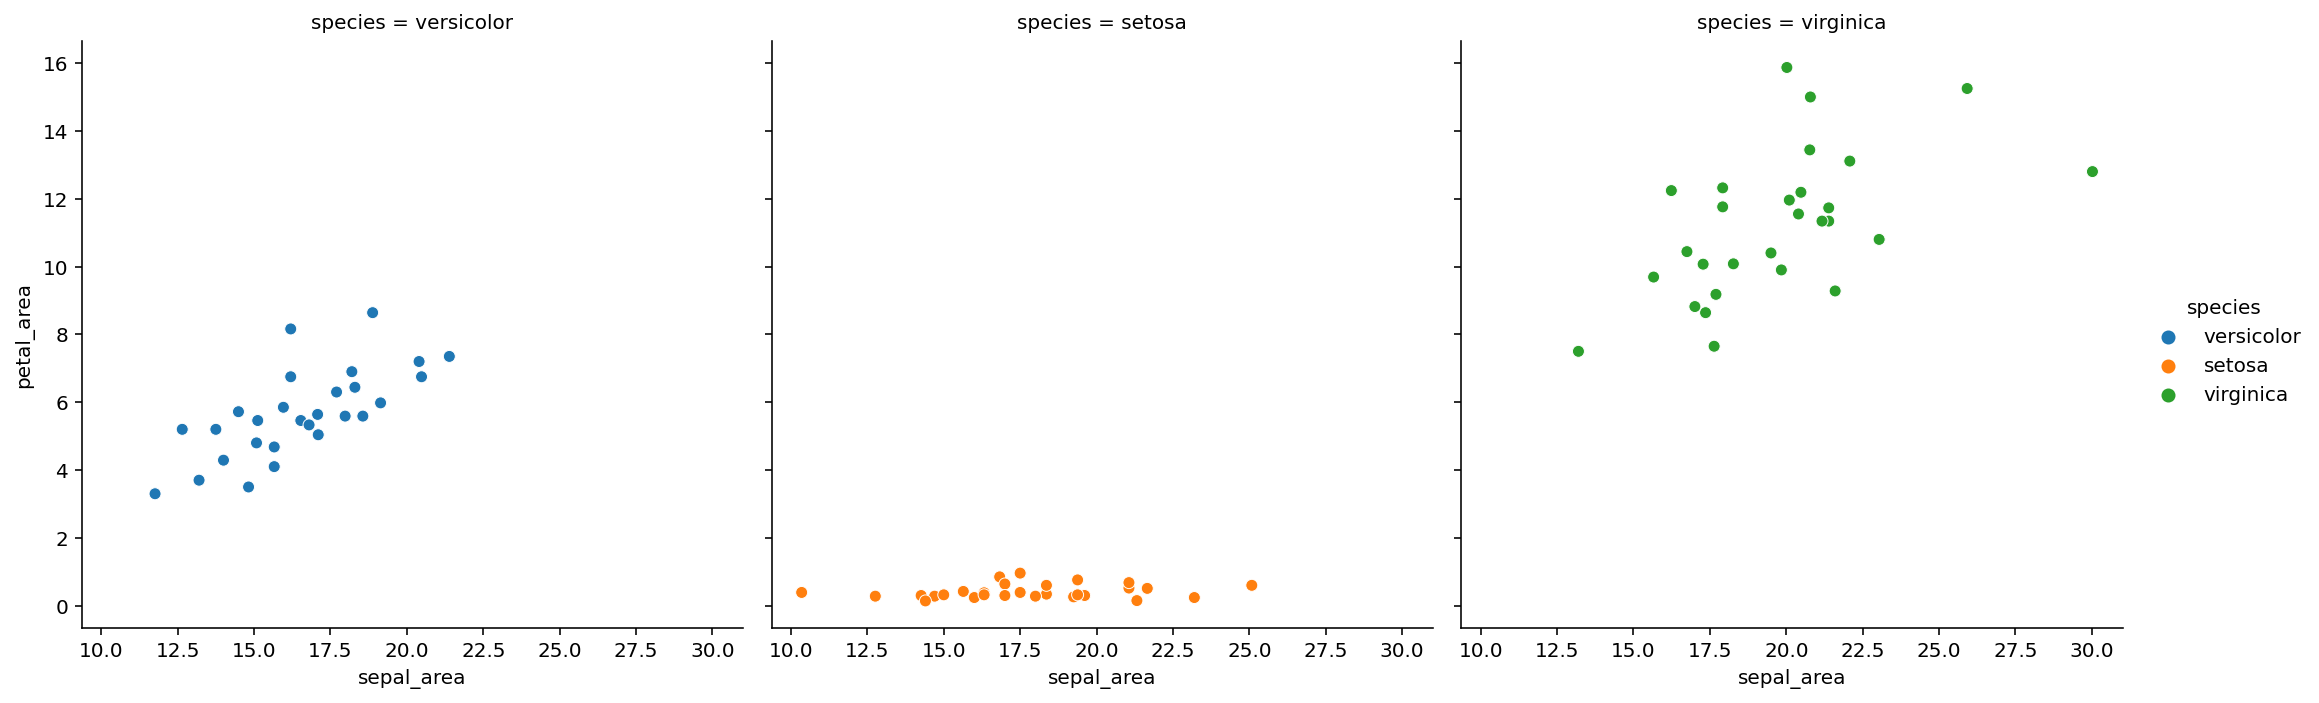

In [31]:
sns.relplot(data=train, x='sepal_area', y='petal_area', kind='scatter', hue='species', col='species')

#### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

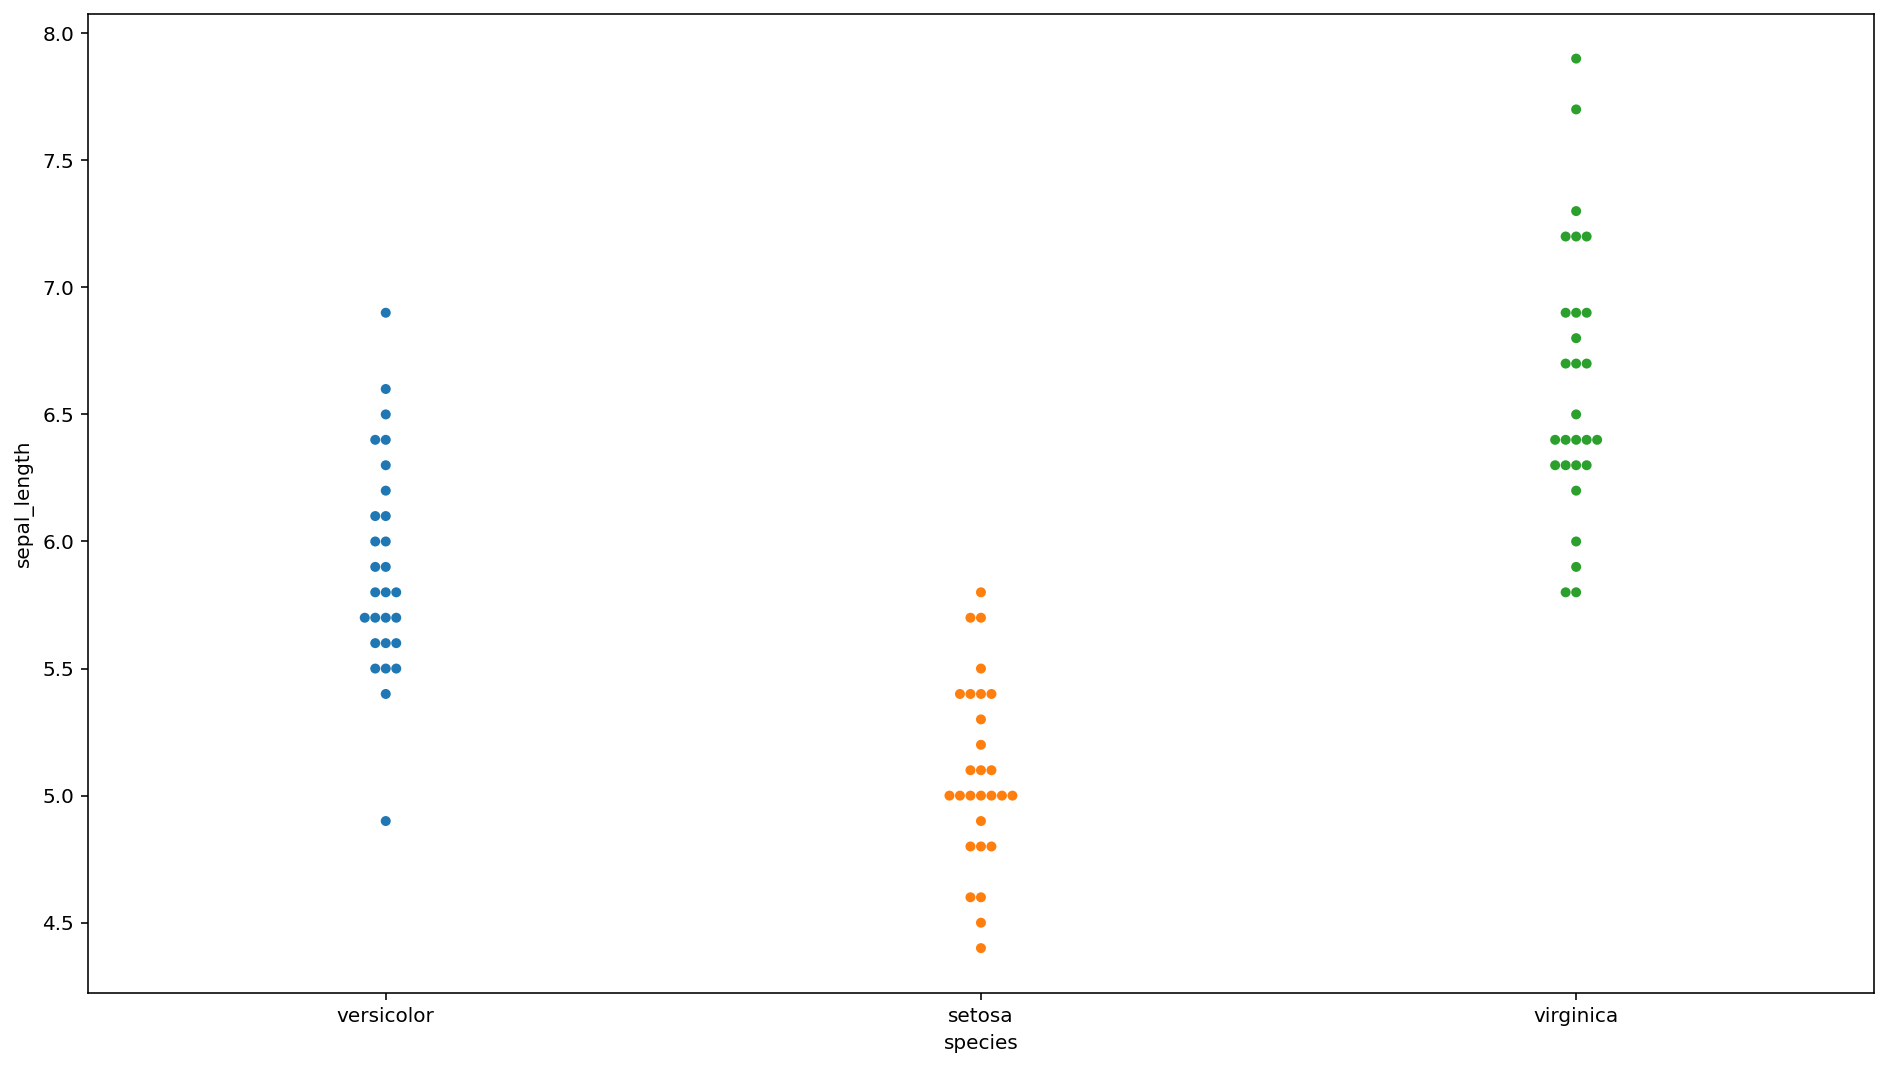

In [32]:
sns.swarmplot(data=train, x='species', y='sepal_length')

In [33]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,0,1,0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,1,0,0,19.25,0.26
133,virginica,6.3,2.8,5.1,1.5,0,0,1,17.64,7.65
95,versicolor,5.7,3.0,4.2,1.2,0,1,0,17.10,5.04
18,setosa,5.7,3.8,1.7,0.3,1,0,0,21.66,0.51


In [34]:
train_melt = train.melt(id_vars = 'species')

In [35]:
train_melt.head()

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7


<AxesSubplot:xlabel='variable', ylabel='value'>

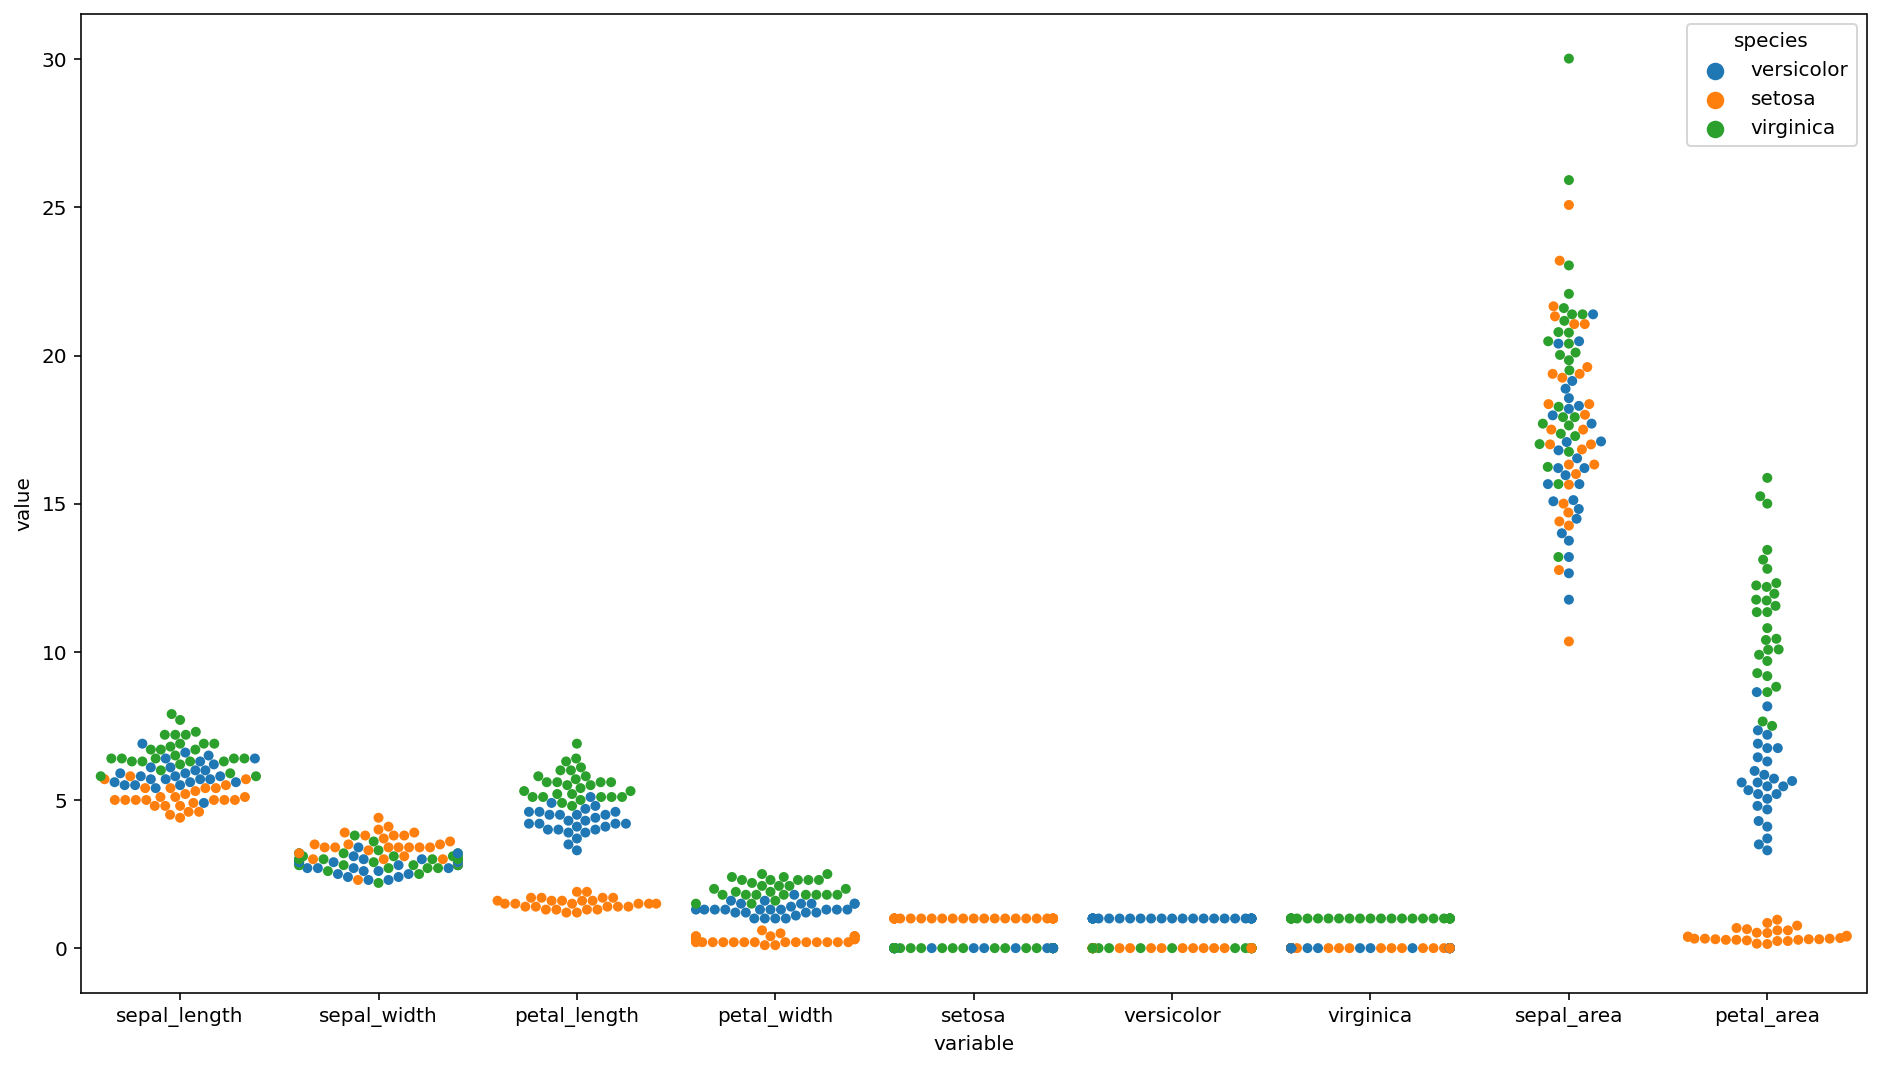

In [36]:
sns.swarmplot(data=train_melt, x='variable', y='value', hue='species')

#### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [37]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,-0.722317,0.024224,0.698093,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.623439,-0.442075,-0.181364,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,-0.928394,0.205008,0.723386,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,-0.877707,0.104650,0.773058,0.299920,0.982404
setosa,-0.722317,0.623439,-0.928394,-0.877707,1.000000,-0.500000,-0.500000,-0.052203,-0.816541
versicolor,0.024224,-0.442075,0.205008,0.104650,-0.500000,1.000000,-0.500000,-0.320752,-0.015033
virginica,0.698093,-0.181364,0.723386,0.773058,-0.500000,-0.500000,1.000000,0.372955,0.831575
sepal_area,0.619853,0.673554,0.271618,0.299920,-0.052203,-0.320752,0.372955,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,-0.816541,-0.015033,0.831575,0.373870,1.000000


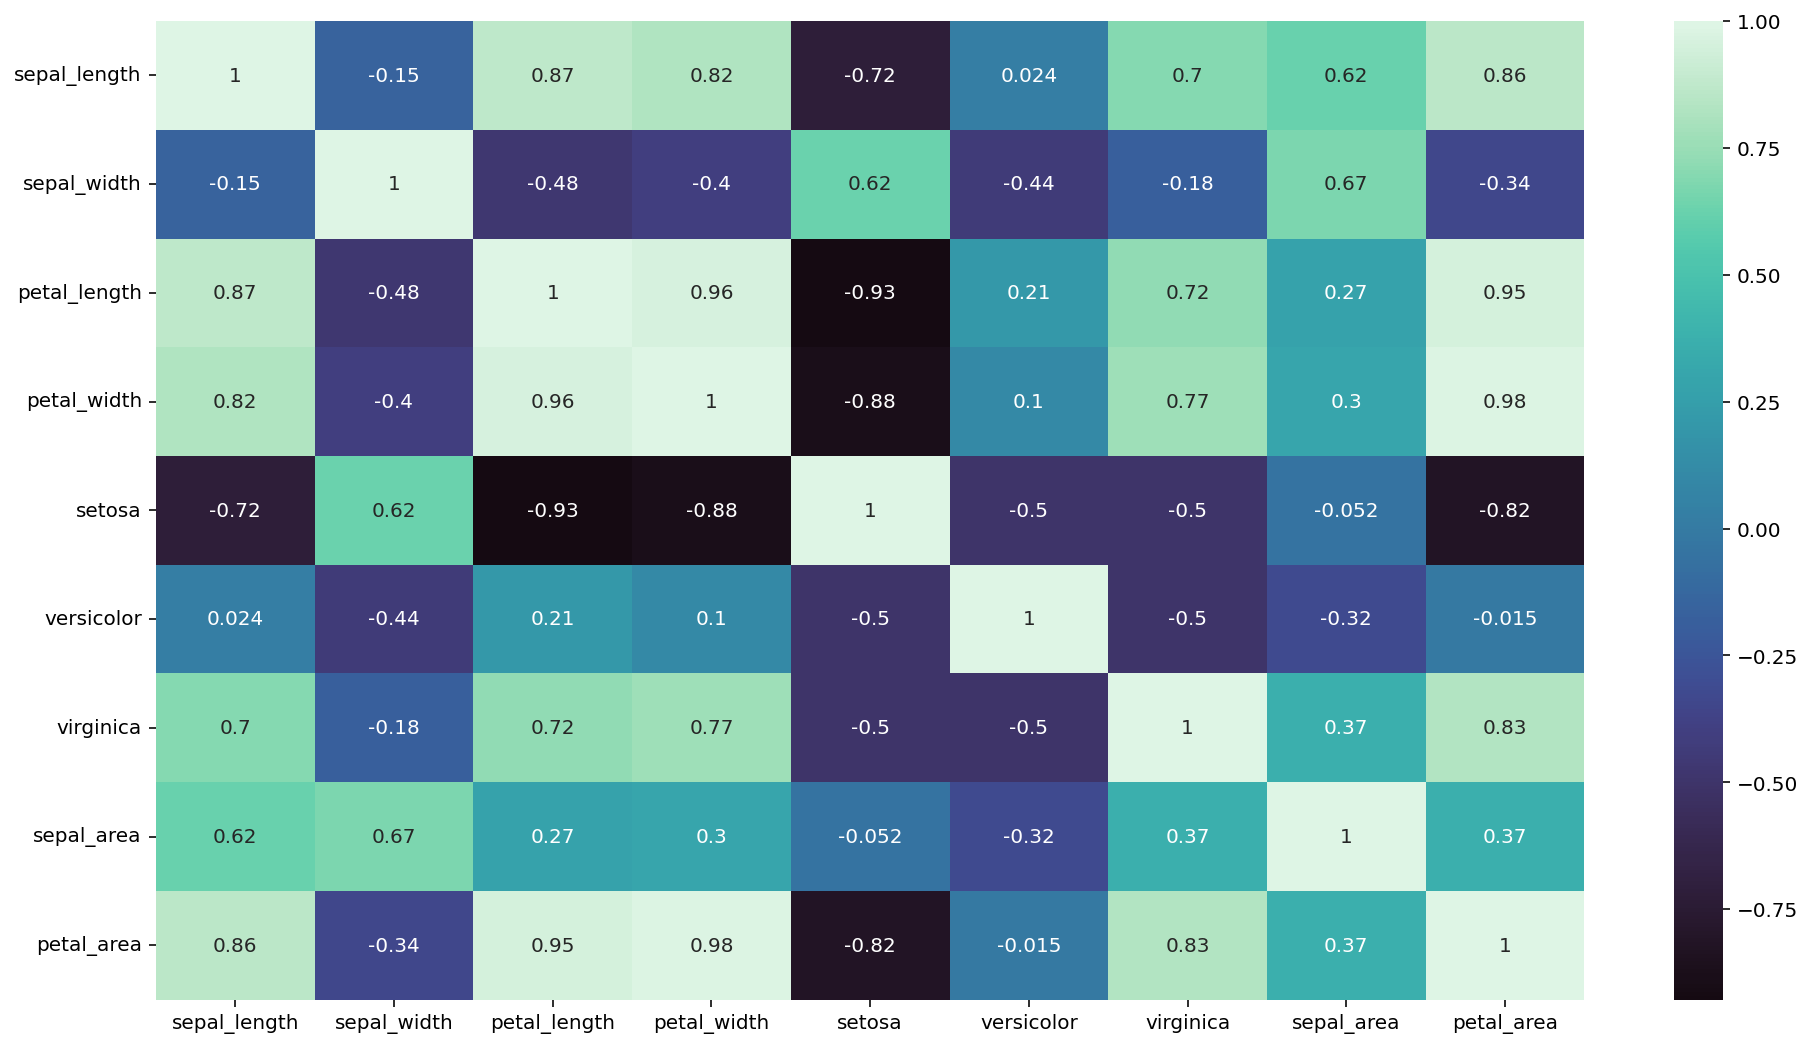

In [38]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()

**Takeaways**

- most measures correlate with each other, the least is sepal_width with sepal_lenght @ -.15.  

- Negative correlations: Wider sepals => shorter & narrower petals (smaller petal areas)

- Positive correlations: Longer sepals => longer & wider petals (larger petal areas)

- Little to no **LINEAR** correlation: sepal length & sepal width. 

A scatter matrix visualizing the interaction of each variable.

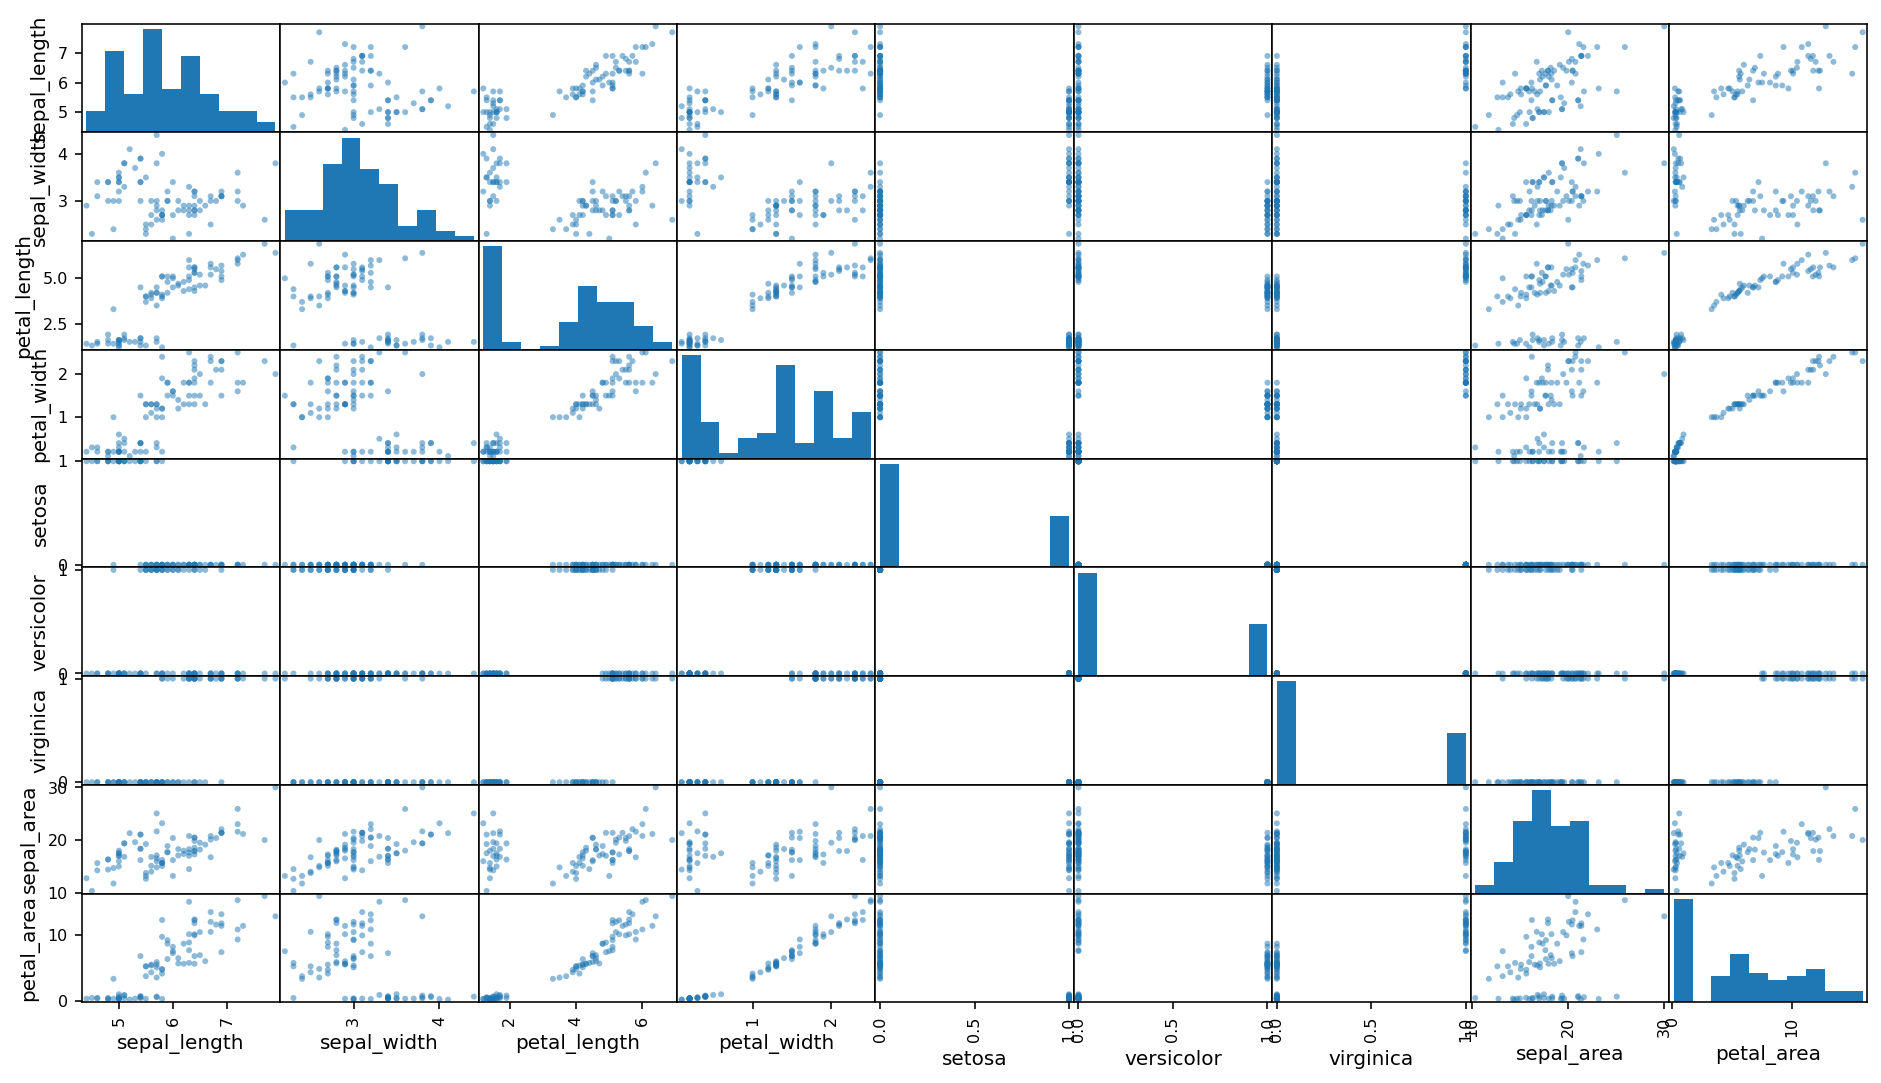

In [39]:
pd.plotting.scatter_matrix(train)
plt.show()

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_width   84 non-null     float64
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
 8   sepal_area    84 non-null     float64
 9   petal_area    84 non-null     float64
dtypes: float64(6), object(1), uint8(3)
memory usage: 7.6+ KB


**Takeaways** 

- petal length + petal width show the most seperation between species.
- setosa has the shortest and narrowest petals. It will be the easiest to determine. 
- petal area seems to show the largest separation between virginica & versicolor of all the individual features. 
- virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say. 
- virginica and versicolor show little to no difference when it comes to the width of the sepals. 

**Hypothesis**

- alpha = .05

- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [41]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

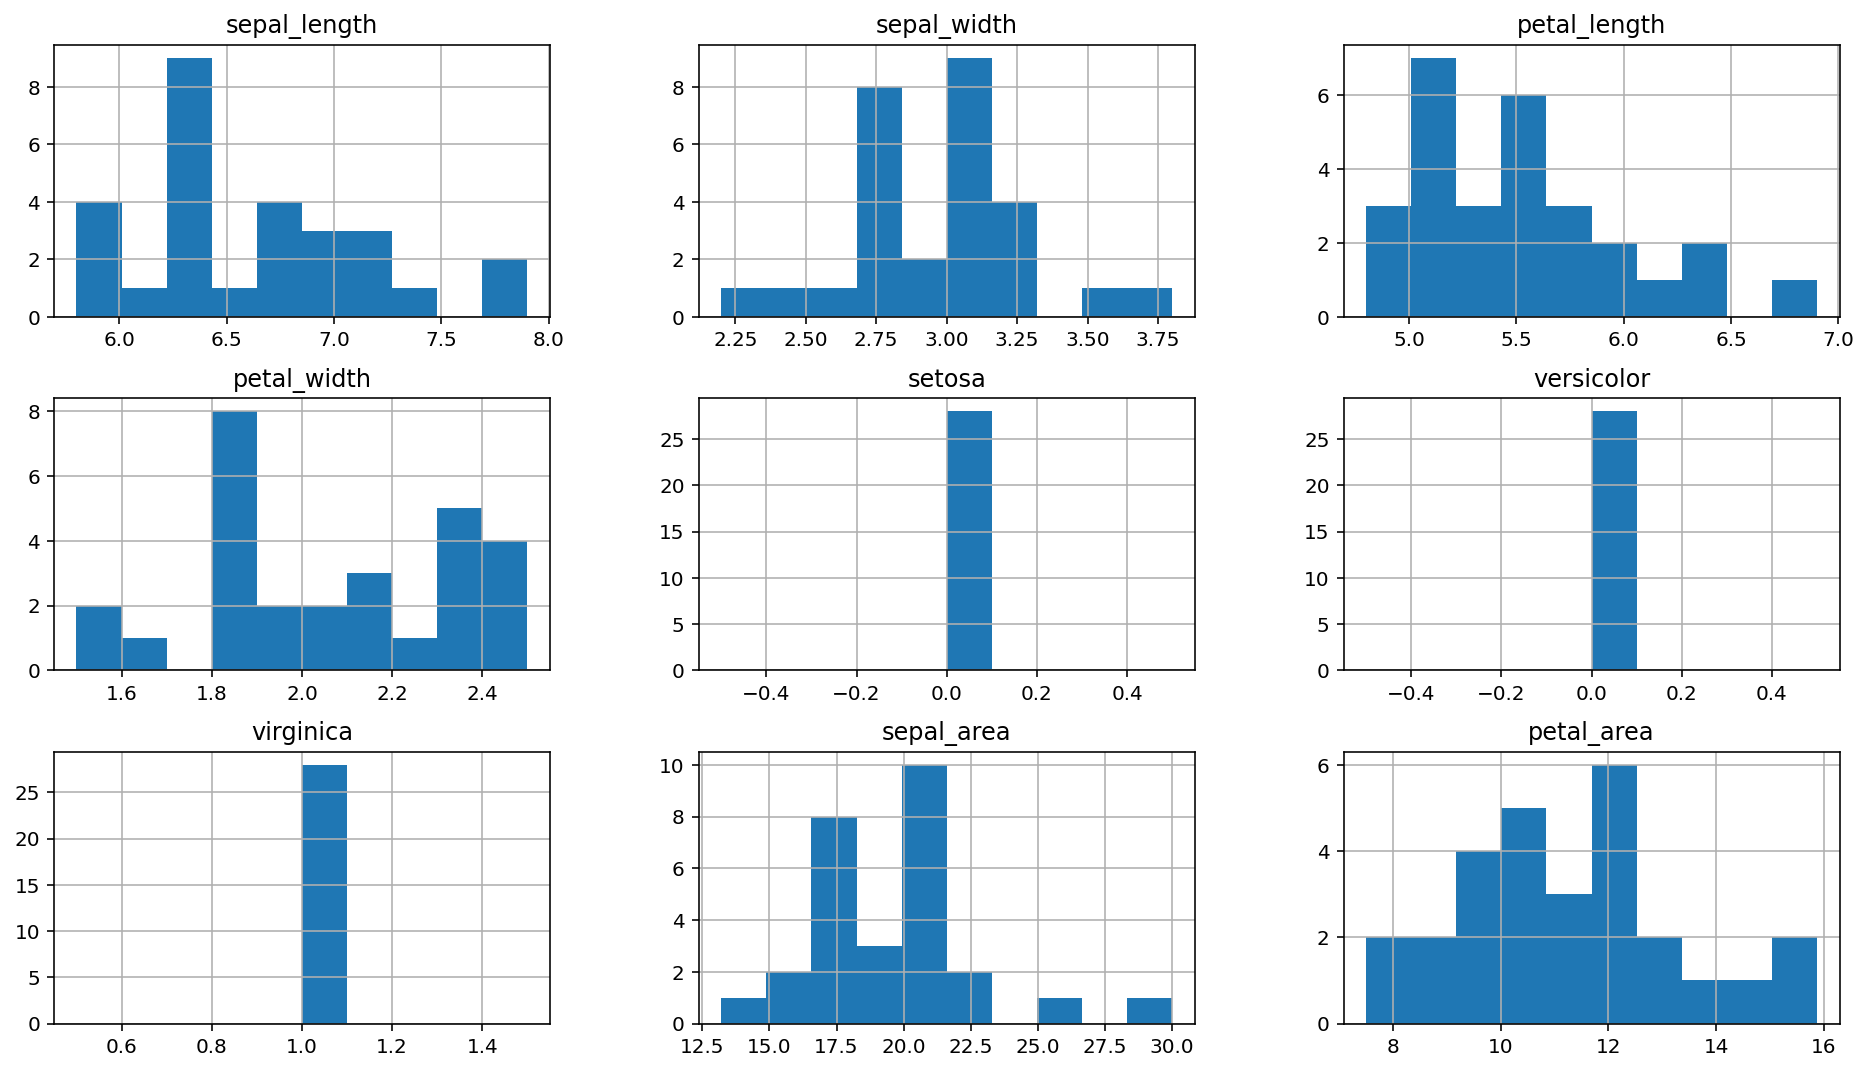

In [42]:
virginica.hist()
plt.show()

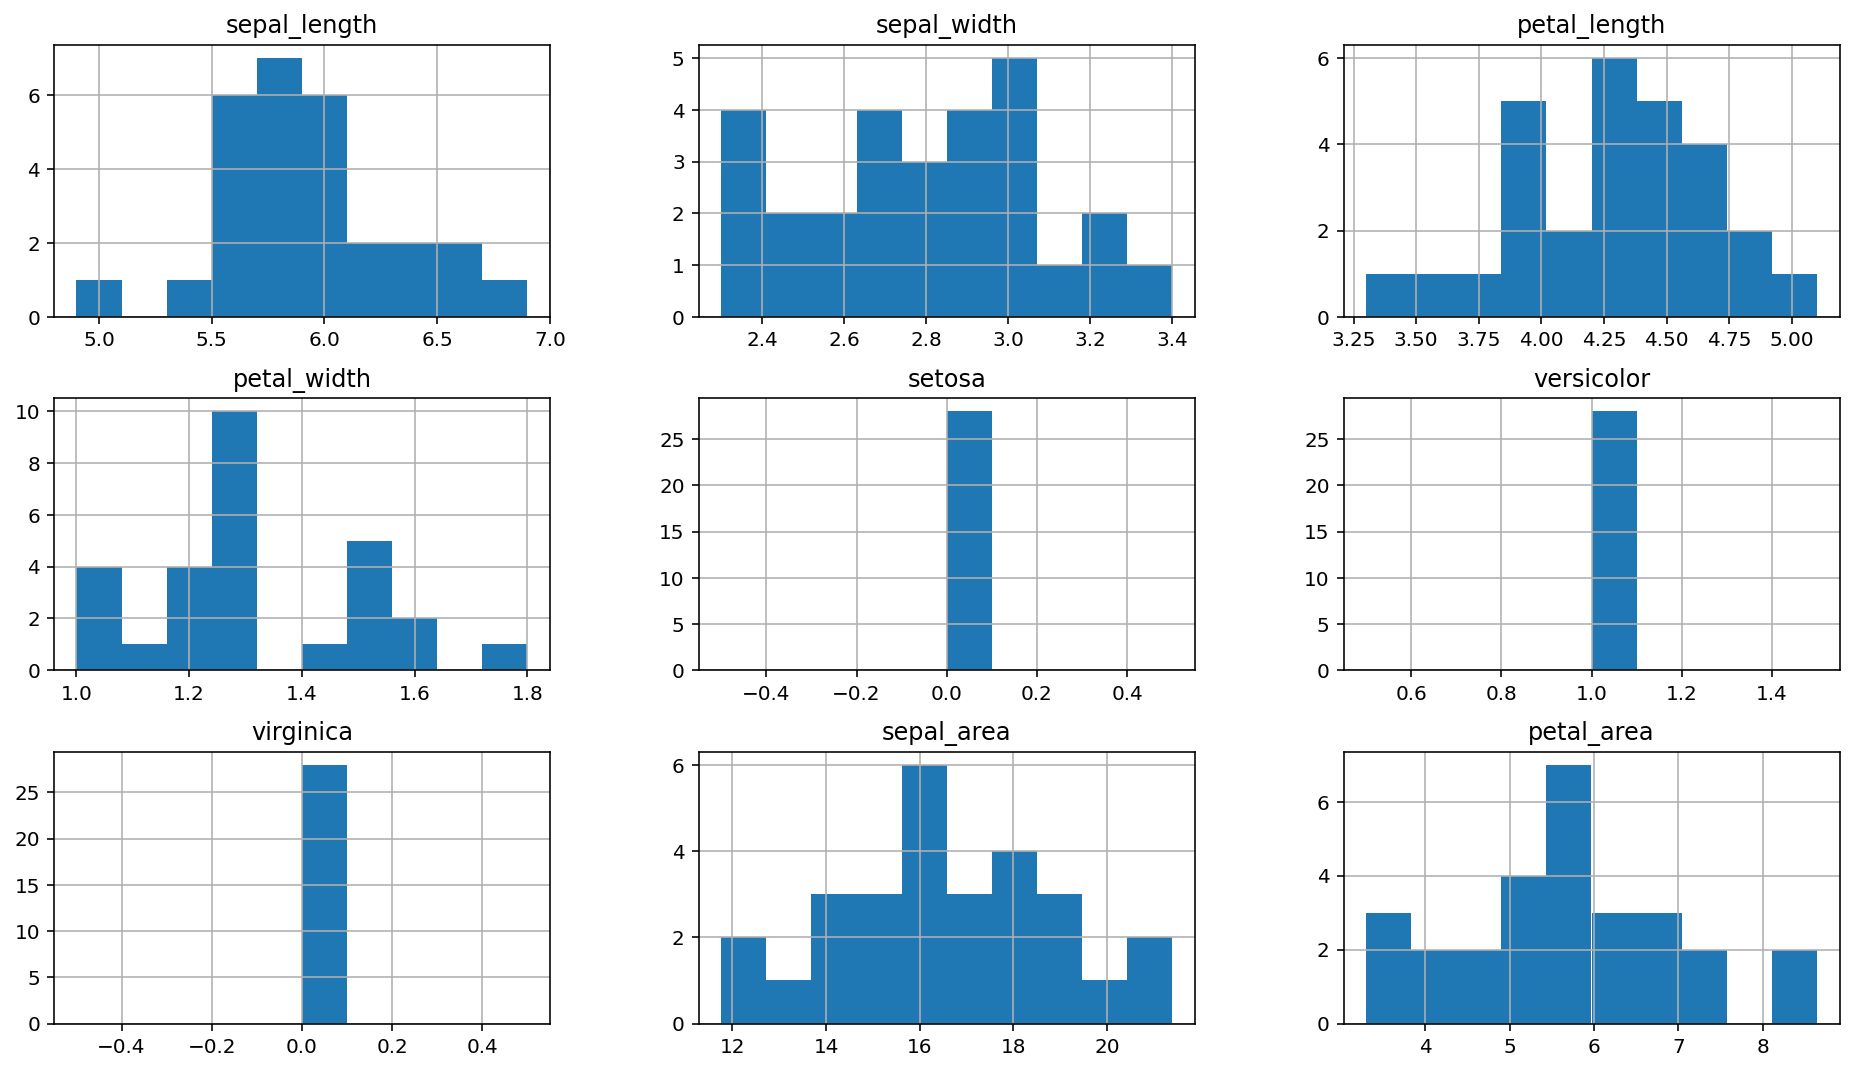

In [43]:
versicolor.hist()
plt.show()

In [44]:
virginica.describe()['sepal_length']['std']

0.5323776159136727

In [45]:
versicolor.describe()['sepal_length']

count    28.000000
mean      5.896429
std       0.425556
min       4.900000
25%       5.600000
50%       5.800000
75%       6.125000
max       6.900000
Name: sepal_length, dtype: float64

In [46]:
import scipy.stats as stats

In [47]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

In [48]:
tstat

5.656491804882077

In [49]:
p

6.856736413800083e-07

**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

What about sepal_width? Let's use the Mann-Whitney test for demo purposes. 

**Hypothesis**

- alpha = .05
for randomly selected values X and Y from two populations, the probability of X being greater than Y is equal to the probability of Y being greater than X.


- $H_0$: For randomly selected values of sepal width, the probability of sepal width for virginica being greater than the sepal width for versicolor is equal to the probability of sepal width for versicolor being greater than the sepal width for virginica.

        p(virginica > versicolor) == p(versicolor > virginica)

- $H_a$: The probability of randomly selected values being larger than each other by class is not equal. $\mu_{virginica} != \mu_{versicolor}$. 

In [50]:
stats.mannwhitneyu(virginica.sepal_width, versicolor.sepal_width)

MannwhitneyuResult(statistic=510.0, pvalue=0.05257259139845694)

**Conclusion**

We reject $H_0$ that the sepal width is the same! 

**Takeaway**

Sepal width, while not the strongest indicator, is still useful. 